**Extraction of data from api**

current air quality data

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from IPython.display import clear_output
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [ ]:
import requests

url = "https://address-from-to-latitude-longitude.p.rapidapi.com/geolocationapi"

querystring = {"address":"USA"}

headers = {
	"x-rapidapi-key": "ef09a7075fmshebacd93c474c444p1dbbdcjsnb8ddd730ab6d",
	"x-rapidapi-host": "address-from-to-latitude-longitude.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

{'Results': [{'Relevance': 1, 'longitude': -99.41461919, 'latitude': 39.398703156, 'address': 'United States of America', 'country': 'United States of America'}, {'Relevance': 1, 'longitude': 131.35029271, 'latitude': 33.53232244, 'address': 'Usa, Oita, Japan', 'country': 'Japan'}, {'Relevance': 1, 'longitude': 120.2340028, 'latitude': -4.5123933, 'address': 'Usa, Palakka, Sulawesi Selatan, Indonesia', 'city': 'Palakka', 'region': 'Usa', 'subregion': 'Bone', 'country': 'Indonesia'}, {'Relevance': 1, 'longitude': 8.9608058, 'latitude': 7.2947879, 'address': 'Usa, Gboko, Benue, Nigeria', 'city': 'Gboko', 'region': 'Usa', 'country': 'Nigeria'}, {'Relevance': 1, 'longitude': 6.0963873, 'latitude': 9.9873928, 'address': 'Usa, Niger, Nigeria', 'region': 'Usa', 'country': 'Nigeria'}, {'Relevance': 1, 'longitude': 10.8713592, 'latitude': 62.4196904, 'address': 'Usa, Tolga, Innlandet, Norway', 'city': 'Usa', 'subregion': 'Tolga', 'country': 'Norway'}, {'Relevance': 1, 'longitude': 1.21574, 'lat

In [ ]:
import requests
import pandas as pd
df_data = pd.DataFrame()

url = "https://air-quality-by-api-ninjas.p.rapidapi.com/v1/airquality"

for city in city_coordinates['City'].values:
    querystring = {"city":city}

    headers = {
      "x-rapidapi-key": "ef09a7075fmshebacd93c474c444p1dbbdcjsnb8ddd730ab6d",
      "x-rapidapi-host": "air-quality-by-api-ninjas.p.rapidapi.com"
    }

    response = requests.get(url, headers=headers, params=querystring)

    df_data = pd.concat([df_data,pd.json_normalize(response.json())])


    #print(response.json())

NameError: name 'city_coordinates' is not defined

In [ ]:
df_data.head()

Empty DataFrame
Columns: []
Index: []

In [ ]:
df_data.shape

(0, 0)

In [ ]:
df_data.to_csv('current_air_quality_data.csv',index=False)

In [ ]:
df_air_quality_api = pd.read_csv('/content/current_air_quality_data.csv')
df_air_quality_api.head()


FileNotFoundError: [Errno 2] No such file or directory: '/content/current_air_quality_data.csv'

In [ ]:
df_air_quality_api = df_air_quality_api.drop(columns =['error'])
df_air_quality_api

overall_aqi  CO.concentration  CO.aqi  NO2.concentration  NO2.aqi  \
0           26.0            216.96     2.0              21.25     26.0   
1          222.0            473.98     5.0              29.13     36.0   
2          145.0           2002.72    22.0              75.40     94.0   
3           59.0            594.14     6.0              23.99     29.0   
4          180.0            360.49     4.0               4.11      5.0   
..           ...               ...     ...                ...      ...   
895         45.0            260.35     2.0               3.90      4.0   
896         77.0            687.60     7.0               7.28      9.0   
897         55.0            263.69     2.0              23.31     29.0   
898        141.0            240.33     2.0               2.14      2.0   
899        109.0            243.66     2.0               4.63      5.0   

     O3.concentration  O3.aqi  SO2.concentration  SO2.aqi  \
0               18.42    15.0              12.16     17.0   
1              173.09   222.0              10.85     15.0   
2                4.96     4.0              73.43     67.0   
3               12.88    10.0              22.89     33.0   
4              107.29   180.0               2.12      3.0   
..                ...     ...                ...      ...   
895             53.64    45.0               2.71      3.0   
896             62.23    60.0               0.83      1.0   
897             60.80    55.0               8.11     11.0   
898             91.55   141.0               0.66      0.0   
899             78.68   109.0               1.07      1.0   

     PM2.5.concentration  PM2.5.aqi  PM10.concentration  PM10.aqi  
0                   4.57       14.0                8.71       8.0  
1                  50.01      119.0               54.90      50.0  
2                  63.27      145.0               68.17      57.0  
3                  19.95       59.0               34.83      32.0  
4                  16.58       52.0               19.99      18.0  
..                   ...        ...                 ...       ...  
895                10.94       35.0               13.20      12.0  
896                29.34       77.0               39.94      36.0  
897                 3.06        9.0                3.73       3.0  
898                 0.57        1.0                1.20       1.0  
899                 0.76        2.0                1.61       1.0  

[900 rows x 13 columns]

In [ ]:
df_air_quality_api = df_air_quality_api.rename(columns={"CO.concentration": "Carbon Monoxide conc",
                       "SO2.concentration":"sulfer dioxide conc",
                       "NO2.concentration":"Nitrogen Oxides conc",})
df_air_quality_api.head(5)

overall_aqi  Carbon Monoxide conc  CO.aqi  Nitrogen Oxides conc  NO2.aqi  \
0         26.0                216.96     2.0                 21.25     26.0   
1        222.0                473.98     5.0                 29.13     36.0   
2        145.0               2002.72    22.0                 75.40     94.0   
3         59.0                594.14     6.0                 23.99     29.0   
4        180.0                360.49     4.0                  4.11      5.0   

   O3.concentration  O3.aqi  sulfer dioxide conc  SO2.aqi  \
0             18.42    15.0                12.16     17.0   
1            173.09   222.0                10.85     15.0   
2              4.96     4.0                73.43     67.0   
3             12.88    10.0                22.89     33.0   
4            107.29   180.0                 2.12      3.0   

   PM2.5.concentration  PM2.5.aqi  PM10.concentration  PM10.aqi  
0                 4.57       14.0                8.71       8.0  
1                50.01      119.0               54.90      50.0  
2                63.27      145.0               68.17      57.0  
3                19.95       59.0               34.83      32.0  
4                16.58       52.0               19.99      18.0

In [ ]:
df_air_quality_api.isnull().sum()

overall_aqi             15
Carbon Monoxide conc    15
CO.aqi                  15
Nitrogen Oxides conc    15
NO2.aqi                 15
O3.concentration        15
O3.aqi                  15
sulfer dioxide conc     15
SO2.aqi                 15
PM2.5.concentration     15
PM2.5.aqi               15
PM10.concentration      15
PM10.aqi                15
dtype: int64

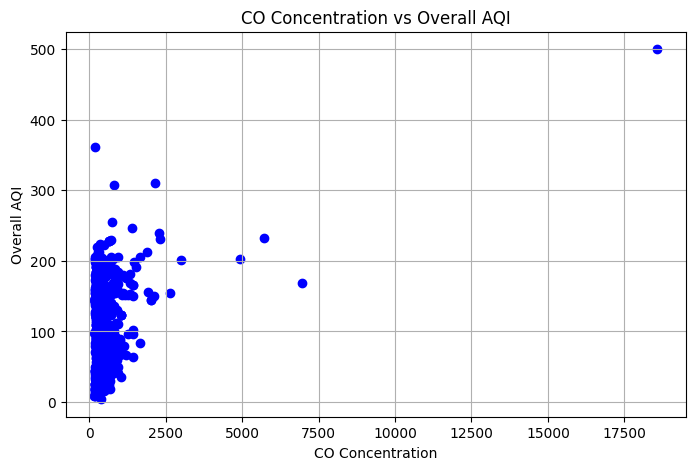

In [ ]:
import matplotlib.pyplot as plt

# Visualization 1: Correlation between CO concentration and overall AQI
plt.figure(figsize=(8, 5))
plt.scatter(df_air_quality_api['Carbon Monoxide conc'], df_air_quality_api['overall_aqi'], color='blue')
plt.title('CO Concentration vs Overall AQI')
plt.xlabel('CO Concentration')
plt.ylabel('Overall AQI')
plt.grid(True)
plt.show()

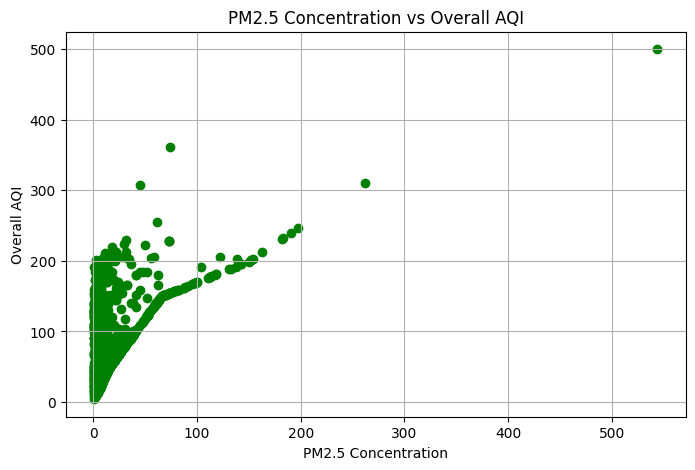

In [ ]:
# Visualization 2: PM2.5 concentration vs Overall AQI
plt.figure(figsize=(8, 5))
plt.scatter(df_air_quality_api['PM2.5.concentration'], df_air_quality_api['overall_aqi'], color='green')
plt.title('PM2.5 Concentration vs Overall AQI')
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Overall AQI')
plt.grid(True)
plt.show()

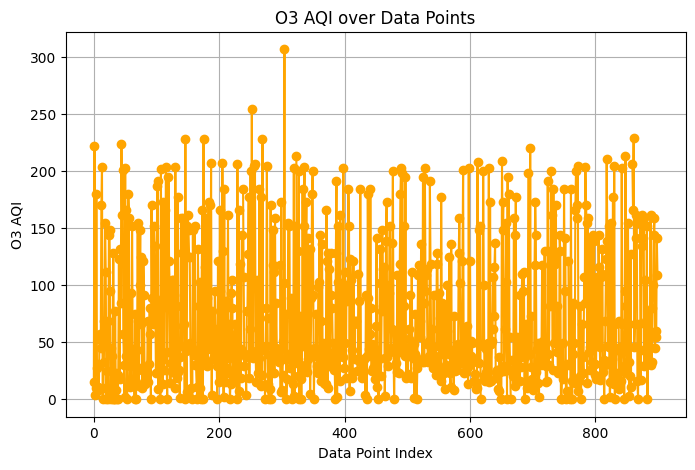

In [ ]:
# Visualization 3: Ozone (O3) AQI over the dataset
plt.figure(figsize=(8, 5))
plt.plot(df_air_quality_api.index, df_air_quality_api['O3.aqi'], color='orange', marker='o')
plt.title('O3 AQI over Data Points')
plt.xlabel('Data Point Index')
plt.ylabel('O3 AQI')
plt.grid(True)
plt.show()

In [ ]:
air_quality_api = pd.read_csv('air_quality_index_2.csv')
air_quality_api.head()

Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;  \
0                              10/03/2004;18.00.00;2                                                                             
1                   10/03/2004;19.00.00;2;1292;112;9                                                                             
2                              10/03/2004;20.00.00;2                                                                             
3                              10/03/2004;21.00.00;2                                                                             
4                              10/03/2004;22.00.00;1                                                                             

                      Unnamed: 1                        Unnamed: 2 Unnamed: 3  \
0                  6;1360;150;11  9;1046;166;1056;113;1692;1268;13       6;48   
1  4;955;103;1174;92;1559;972;13                              3;47        7;0   
2                    2;1402;88;9   0;939;131;1140;114;1555;1074;11       9;54   
3                    2;1376;80;9   2;948;172;1092;122;1584;1203;11       0;60   
4                    6;1272;51;6   5;836;131;1205;116;1490;1110;11       2;59   

  Unnamed: 4 Unnamed: 5  
0        9;0     7578;;  
1     7255;;        NaN  
2        0;0     7502;;  
3        0;0     7867;;  
4        6;0     7888;;

In [ ]:
air_quality_api = pd.read_csv('air_quality_index_2.csv', sep=';')
air_quality_api

Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  \
0     10/03/2004  18.00.00    2,6       1360.0     150.0     11,9   
1     10/03/2004  19.00.00      2       1292.0     112.0      9,4   
2     10/03/2004  20.00.00    2,2       1402.0      88.0      9,0   
3     10/03/2004  21.00.00    2,2       1376.0      80.0      9,2   
4     10/03/2004  22.00.00    1,6       1272.0      51.0      6,5   
...          ...       ...    ...          ...       ...      ...   
9466         NaN       NaN    NaN          NaN       NaN      NaN   
9467         NaN       NaN    NaN          NaN       NaN      NaN   
9468         NaN       NaN    NaN          NaN       NaN      NaN   
9469         NaN       NaN    NaN          NaN       NaN      NaN   
9470         NaN       NaN    NaN          NaN       NaN      NaN   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0        1174.0     92.0        1559.0   
2             939.0    131.0        1140.0    114.0        1555.0   
3             948.0    172.0        1092.0    122.0        1584.0   
4             836.0    131.0        1205.0    116.0        1490.0   
...             ...      ...           ...      ...           ...   
9466            NaN      NaN           NaN      NaN           NaN   
9467            NaN      NaN           NaN      NaN           NaN   
9468            NaN      NaN           NaN      NaN           NaN   
9469            NaN      NaN           NaN      NaN           NaN   
9470            NaN      NaN           NaN      NaN           NaN   

      PT08.S5(O3)     T    RH      AH  Unnamed: 15  ,,,,,  
0          1268.0  13,6  48,9  0,7578          NaN    NaN  
1           972.0  13,3  47,7  0,7255          NaN      ,  
2          1074.0  11,9  54,0  0,7502          NaN    NaN  
3          1203.0  11,0  60,0  0,7867          NaN    NaN  
4          1110.0  11,2  59,6  0,7888          NaN    NaN  
...           ...   ...   ...     ...          ...    ...  
9466          NaN   NaN   NaN     NaN          NaN  ,,,,,  
9467          NaN   NaN   NaN     NaN          NaN  ,,,,,  
9468          NaN   NaN   NaN     NaN          NaN  ,,,,,  
9469          NaN   NaN   NaN     NaN          NaN  ,,,,,  
9470          NaN   NaN   NaN     NaN          NaN  ,,,,,  

[9471 rows x 17 columns]

In [ ]:
air_quality_api = air_quality_api.drop(columns=['Unnamed: 15',',,,,,'])
air_quality_api.dropna(how='all',inplace=True) #since last few rows are only Na's we are dropping them.
air_quality_api

Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  \
0     10/03/2004  18.00.00    2,6       1360.0     150.0     11,9   
1     10/03/2004  19.00.00      2       1292.0     112.0      9,4   
2     10/03/2004  20.00.00    2,2       1402.0      88.0      9,0   
3     10/03/2004  21.00.00    2,2       1376.0      80.0      9,2   
4     10/03/2004  22.00.00    1,6       1272.0      51.0      6,5   
...          ...       ...    ...          ...       ...      ...   
9352  04/04/2005  10.00.00    3,1       1314.0    -200.0     13,5   
9353  04/04/2005  11.00.00    2,4       1163.0    -200.0     11,4   
9354  04/04/2005  12.00.00    2,4       1142.0    -200.0     12,4   
9355  04/04/2005  13.00.00    2,1       1003.0    -200.0      9,5   
9356  04/04/2005  14.00.00    2,2       1071.0    -200.0     11,9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0        1174.0     92.0        1559.0   
2             939.0    131.0        1140.0    114.0        1555.0   
3             948.0    172.0        1092.0    122.0        1584.0   
4             836.0    131.0        1205.0    116.0        1490.0   
...             ...      ...           ...      ...           ...   
9352         1101.0    472.0         539.0    190.0        1374.0   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH  
0          1268.0  13,6  48,9  0,7578  
1           972.0  13,3  47,7  0,7255  
2          1074.0  11,9  54,0  0,7502  
3          1203.0  11,0  60,0  0,7867  
4          1110.0  11,2  59,6  0,7888  
...           ...   ...   ...     ...  
9352       1729.0  21,9  29,3  0,7568  
9353       1269.0  24,3  23,7  0,7119  
9354       1092.0  26,9  18,3  0,6406  
9355        770.0  28,3  13,5  0,5139  
9356        816.0  28,5  13,1  0,5028  

[9357 rows x 15 columns]

In [ ]:
air_quality_api = air_quality_api.rename(columns={"CO(GT)": "Carbon Monoxide","PT08.S1(CO)":"Tin Oxide",
                       "NMHC(GT)":"Non Metanic HydroCarbons",
                       "C6H6(GT)":"Benzene","PT08.S2(NMHC)":"Titania",
                       "NOx(GT)":"Nitrogen Oxides",
                      "PT08.S3(NOx)":"Tungsten Oxide (NOx targeted)",
                       "NO2(GT)":"Nitrogen Dioxide","PT08.S4(NO2)":"Tungsten Oxide (NO2 targeted)",
                      "PT08.S5(O3)":"Indium Oxide (O3)","T":"Temperature in Â°C",
                       "RH":"Relative Humidity (%)","AH":"Absolute Humidity"})
air_quality_api.head(5)

Date      Time Carbon Monoxide  Tin Oxide  Non Metanic HydroCarbons  \
0  10/03/2004  18.00.00             2,6     1360.0                     150.0   
1  10/03/2004  19.00.00               2     1292.0                     112.0   
2  10/03/2004  20.00.00             2,2     1402.0                      88.0   
3  10/03/2004  21.00.00             2,2     1376.0                      80.0   
4  10/03/2004  22.00.00             1,6     1272.0                      51.0   

  Benzene  Titania  Nitrogen Oxides  Tungsten Oxide (NOx targeted)  \
0    11,9   1046.0            166.0                         1056.0   
1     9,4    955.0            103.0                         1174.0   
2     9,0    939.0            131.0                         1140.0   
3     9,2    948.0            172.0                         1092.0   
4     6,5    836.0            131.0                         1205.0   

   Nitrogen Dioxide  Tungsten Oxide (NO2 targeted)  Indium Oxide (O3)  \
0             113.0                         1692.0             1268.0   
1              92.0                         1559.0              972.0   
2             114.0                         1555.0             1074.0   
3             122.0                         1584.0             1203.0   
4             116.0                         1490.0             1110.0   

  Temperature in Â°C Relative Humidity (%) Absolute Humidity  
0               13,6                  48,9            0,7578  
1               13,3                  47,7            0,7255  
2               11,9                  54,0            0,7502  
3               11,0                  60,0            0,7867  
4               11,2                  59,6            0,7888

In [ ]:
air_quality_api['Carbon Monoxide'] = air_quality_api['Carbon Monoxide'].astype(str).str.replace(',', '.')
air_quality_api['Benzene'] = air_quality_api['Benzene'].astype(str).str.replace(',', '.')
air_quality_api['Temperature in Â°C'] = air_quality_api['Temperature in Â°C'].astype(str).str.replace(',', '.')
air_quality_api['Relative Humidity (%)'] = air_quality_api['Relative Humidity (%)'].astype(str).str.replace(',', '.')
air_quality_api['Absolute Humidity'] = air_quality_api['Absolute Humidity'].astype(str).str.replace(',', '.')
air_quality_api['Time'] = air_quality_api['Time'].str.replace(':', '.')
air_quality_api.head()

Date      Time Carbon Monoxide  Tin Oxide  Non Metanic HydroCarbons  \
0  10/03/2004  18.00.00             2.6     1360.0                     150.0   
1  10/03/2004  19.00.00               2     1292.0                     112.0   
2  10/03/2004  20.00.00             2.2     1402.0                      88.0   
3  10/03/2004  21.00.00             2.2     1376.0                      80.0   
4  10/03/2004  22.00.00             1.6     1272.0                      51.0   

  Benzene  Titania  Nitrogen Oxides  Tungsten Oxide (NOx targeted)  \
0    11.9   1046.0            166.0                         1056.0   
1     9.4    955.0            103.0                         1174.0   
2     9.0    939.0            131.0                         1140.0   
3     9.2    948.0            172.0                         1092.0   
4     6.5    836.0            131.0                         1205.0   

   Nitrogen Dioxide  Tungsten Oxide (NO2 targeted)  Indium Oxide (O3)  \
0             113.0                         1692.0             1268.0   
1              92.0                         1559.0              972.0   
2             114.0                         1555.0             1074.0   
3             122.0                         1584.0             1203.0   
4             116.0                         1490.0             1110.0   

  Temperature in Â°C Relative Humidity (%) Absolute Humidity  
0               13.6                  48.9            0.7578  
1               13.3                  47.7            0.7255  
2               11.9                  54.0            0.7502  
3               11.0                  60.0            0.7867  
4               11.2                  59.6            0.7888

In [ ]:
air_quality_api = air_quality_api.replace(-200,np.nan)
air_quality_api = air_quality_api.replace('-200',np.nan)
air_quality_api = air_quality_api.replace(-200.0,np.nan)
air_quality_api = air_quality_api.replace('-200.0',np.nan)

In [ ]:
air_quality_api['Benzene'].value_counts()

Benzene
3.6     84
2.8     82
3.8     79
4.0     78
3.1     77
        ..
38.4     1
38.8     1
36.5     1
44.0     1
35.5     1
Name: count, Length: 407, dtype: int64

In [ ]:
air_quality_api.shape

(9357, 15)

In [ ]:
air_quality_api.isna().sum()

Date                                0
Time                                0
Carbon Monoxide                  1683
Tin Oxide                         366
Non Metanic HydroCarbons         8443
Benzene                           366
Titania                           366
Nitrogen Oxides                  1639
Tungsten Oxide (NOx targeted)     366
Nitrogen Dioxide                 1642
Tungsten Oxide (NO2 targeted)     366
Indium Oxide (O3)                 366
Temperature in Â°C                366
Relative Humidity (%)             366
Absolute Humidity                 366
dtype: int64

In [ ]:
air_quality_api.columns

Index(['Date', 'Time', 'Carbon Monoxide', 'Tin Oxide',
       'Non Metanic HydroCarbons', 'Benzene', 'Titania', 'Nitrogen Oxides',
       'Tungsten Oxide (NOx targeted)', 'Nitrogen Dioxide',
       'Tungsten Oxide (NO2 targeted)', 'Indium Oxide (O3)',
       'Temperature in Â°C', 'Relative Humidity (%)', 'Absolute Humidity'],
      dtype='object')

In [ ]:
'''air_quality_api.set_index('DateTime', inplace=True)
air_quality_api = air_quality_api.interpolate(method='time') #using interpolation to fill in the missing values
air_quality_api=air_quality_api.reset_index()
air_quality_api.isnull().sum()'''

"air_quality_api.set_index('DateTime', inplace=True)\nair_quality_api = air_quality_api.interpolate(method='time') #using interpolation to fill in the missing values\nair_quality_api=air_quality_api.reset_index()\nair_quality_api.isnull().sum()"

In [ ]:
air_quality_api.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           9357 non-null   object 
 1   Time                           9357 non-null   object 
 2   Carbon Monoxide                7674 non-null   object 
 3   Tin Oxide                      8991 non-null   float64
 4   Non Metanic HydroCarbons       914 non-null    float64
 5   Benzene                        8991 non-null   object 
 6   Titania                        8991 non-null   float64
 7   Nitrogen Oxides                7718 non-null   float64
 8   Tungsten Oxide (NOx targeted)  8991 non-null   float64
 9   Nitrogen Dioxide               7715 non-null   float64
 10  Tungsten Oxide (NO2 targeted)  8991 non-null   float64
 11  Indium Oxide (O3)              8991 non-null   float64
 12  Temperature in Â°C             8991 non-null   object

In [ ]:
air_quality_api['Carbon Monoxide'] = pd.to_numeric(air_quality_api['Carbon Monoxide'], errors='coerce')
air_quality_api['Benzene'] = pd.to_numeric(air_quality_api['Benzene'], errors='coerce')
air_quality_api['Temperature in Â°C'] = pd.to_numeric(air_quality_api['Temperature in Â°C'], errors='coerce')
air_quality_api['Relative Humidity (%)'] = pd.to_numeric(air_quality_api['Relative Humidity (%)'], errors='coerce')
air_quality_api['Absolute Humidity'] = pd.to_numeric(air_quality_api['Absolute Humidity'], errors='coerce')
air_quality_api['DateTime'] = pd.to_datetime(air_quality_api['Date'] + ' ' + air_quality_api['Time'], format='%d/%m/%Y %H.%M.%S', dayfirst = True)


In [ ]:
air_quality_api.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           9357 non-null   object        
 1   Time                           9357 non-null   object        
 2   Carbon Monoxide                7674 non-null   float64       
 3   Tin Oxide                      8991 non-null   float64       
 4   Non Metanic HydroCarbons       914 non-null    float64       
 5   Benzene                        8991 non-null   float64       
 6   Titania                        8991 non-null   float64       
 7   Nitrogen Oxides                7718 non-null   float64       
 8   Tungsten Oxide (NOx targeted)  8991 non-null   float64       
 9   Nitrogen Dioxide               7715 non-null   float64       
 10  Tungsten Oxide (NO2 targeted)  8991 non-null   float64       
 11  Indium Oxide (O3)     

In [ ]:
air_quality_api = air_quality_api.drop(columns=['Date','Time'])


**Outliers**

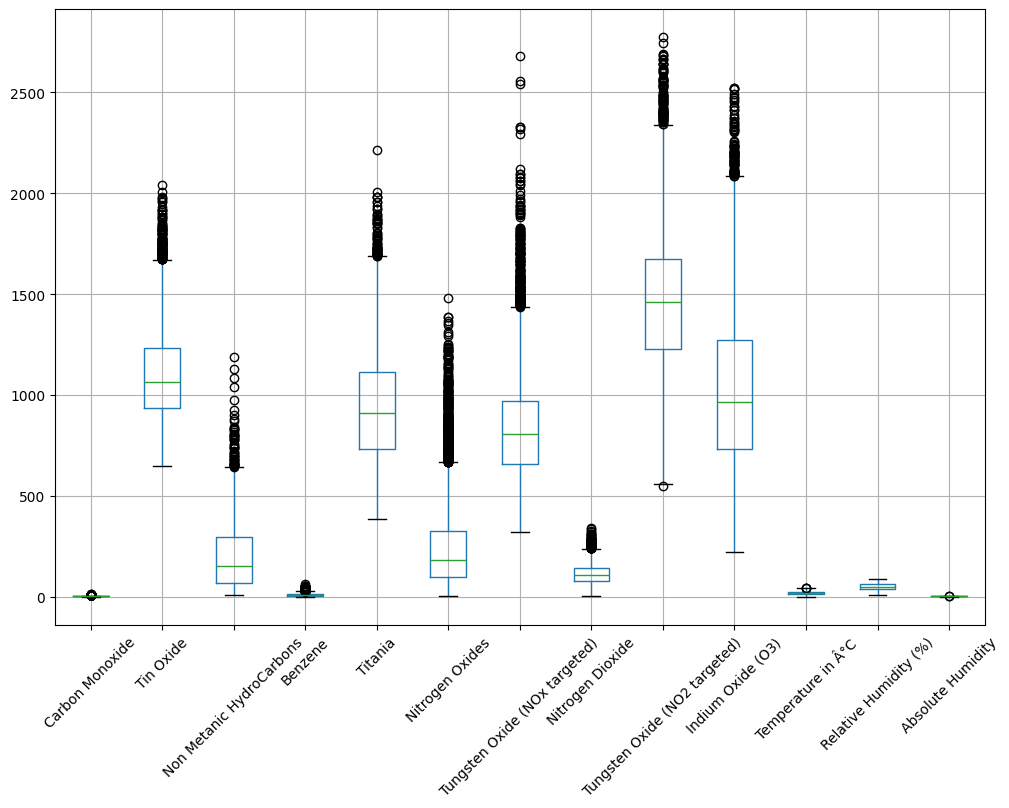

In [ ]:
air_quality_api.boxplot()
plt.gcf().set_size_inches(12, 8)
plt.xticks(rotation=45)
plt.show()

In [ ]:
air_quality_api.head()

Carbon Monoxide  Tin Oxide  Non Metanic HydroCarbons  Benzene  Titania  \
0              2.6     1360.0                     150.0     11.9   1046.0   
1              2.0     1292.0                     112.0      9.4    955.0   
2              2.2     1402.0                      88.0      9.0    939.0   
3              2.2     1376.0                      80.0      9.2    948.0   
4              1.6     1272.0                      51.0      6.5    836.0   

   Nitrogen Oxides  Tungsten Oxide (NOx targeted)  Nitrogen Dioxide  \
0            166.0                         1056.0             113.0   
1            103.0                         1174.0              92.0   
2            131.0                         1140.0             114.0   
3            172.0                         1092.0             122.0   
4            131.0                         1205.0             116.0   

   Tungsten Oxide (NO2 targeted)  Indium Oxide (O3)  Temperature in Â°C  \
0                         1692.0             1268.0                13.6   
1                         1559.0              972.0                13.3   
2                         1555.0             1074.0                11.9   
3                         1584.0             1203.0                11.0   
4                         1490.0             1110.0                11.2   

   Relative Humidity (%)  Absolute Humidity            DateTime  
0                   48.9             0.7578 2004-03-10 18:00:00  
1                   47.7             0.7255 2004-03-10 19:00:00  
2                   54.0             0.7502 2004-03-10 20:00:00  
3                   60.0             0.7867 2004-03-10 21:00:00  
4                   59.6             0.7888 2004-03-10 22:00:00

In [ ]:
air_quality_api['Non Metanic HydroCarbons'].median()

150.0

In [ ]:
#air_quality_api.iloc[:,:-1]

In [ ]:
# Calculate Q1, Q3, and IQR for all columns except the last one
Q1 = air_quality_api.iloc[:, :-1].quantile(0.25)
Q3 = air_quality_api.iloc[:, :-1].quantile(0.75)
IQR = Q3 - Q1

mask = (air_quality_api.iloc[:,:-1] < (Q1 - 1.5 * IQR)) | (air_quality_api.iloc[:,:-1] > (Q3 + 1.5 * IQR))
air_quality_api_2 = air_quality_api.iloc[:,:-1].copy()
for i in mask.columns:
    air_quality_api_2[i].astype('float')
    temp = air_quality_api_2[i].median()
    air_quality_api_2.loc[mask[i], i] = temp

((air_quality_api_2.iloc[:,:] < (Q1 - 1.5 * IQR)) | (air_quality_api_2.iloc[:,:] > (Q3 + 1.5 * IQR))).sum()
air_quality_api_2.head()

Carbon Monoxide  Tin Oxide  Non Metanic HydroCarbons  Benzene  Titania  \
0              2.6     1360.0                     150.0     11.9   1046.0   
1              2.0     1292.0                     112.0      9.4    955.0   
2              2.2     1402.0                      88.0      9.0    939.0   
3              2.2     1376.0                      80.0      9.2    948.0   
4              1.6     1272.0                      51.0      6.5    836.0   

   Nitrogen Oxides  Tungsten Oxide (NOx targeted)  Nitrogen Dioxide  \
0            166.0                         1056.0             113.0   
1            103.0                         1174.0              92.0   
2            131.0                         1140.0             114.0   
3            172.0                         1092.0             122.0   
4            131.0                         1205.0             116.0   

   Tungsten Oxide (NO2 targeted)  Indium Oxide (O3)  Temperature in Â°C  \
0                         1692.0             1268.0                13.6   
1                         1559.0              972.0                13.3   
2                         1555.0             1074.0                11.9   
3                         1584.0             1203.0                11.0   
4                         1490.0             1110.0                11.2   

   Relative Humidity (%)  Absolute Humidity  
0                   48.9             0.7578  
1                   47.7             0.7255  
2                   54.0             0.7502  
3                   60.0             0.7867  
4                   59.6             0.7888

In [ ]:
air_quality_api_2.head(100)

Carbon Monoxide  Tin Oxide  Non Metanic HydroCarbons  Benzene  Titania  \
0               2.6     1360.0                     150.0     11.9   1046.0   
1               2.0     1292.0                     112.0      9.4    955.0   
2               2.2     1402.0                      88.0      9.0    939.0   
3               2.2     1376.0                      80.0      9.2    948.0   
4               1.6     1272.0                      51.0      6.5    836.0   
..              ...        ...                       ...      ...      ...   
95              2.9     1438.0                     156.0     12.0   1051.0   
96              2.5     1478.0                     122.0     12.2   1055.0   
97              4.6     1063.0                     262.0     20.6   1312.0   
98              1.8     1063.0                     341.0     23.1   1381.0   
99              3.4     1560.0                     214.0     14.7   1140.0   

    Nitrogen Oxides  Tungsten Oxide (NOx targeted)  Nitrogen Dioxide  \
0             166.0                         1056.0             113.0   
1             103.0                         1174.0              92.0   
2             131.0                         1140.0             114.0   
3             172.0                         1092.0             122.0   
4             131.0                         1205.0             116.0   
..              ...                            ...               ...   
95            180.0                          943.0             128.0   
96            160.0                          929.0             121.0   
97            261.0                          753.0             157.0   
98            325.0                          681.0             173.0   
99            217.0                          784.0             146.0   

    Tungsten Oxide (NO2 targeted)  Indium Oxide (O3)  Temperature in Â°C  \
0                          1692.0             1268.0                13.6   
1                          1559.0              972.0                13.3   
2                          1555.0             1074.0                11.9   
3                          1584.0             1203.0                11.0   
4                          1490.0             1110.0                11.2   
..                            ...                ...                 ...   
95                         1668.0             1206.0                21.3   
96                         1671.0             1262.0                19.7   
97                         1993.0             1698.0                18.4   
98                         2103.0             1905.0                17.6   
99                         1818.0             1648.0                16.7   

    Relative Humidity (%)  Absolute Humidity  
0                    48.9             0.7578  
1                    47.7             0.7255  
2                    54.0             0.7502  
3                    60.0             0.7867  
4                    59.6             0.7888  
..                    ...                ...  
95                   30.8             0.7696  
96                   36.7             0.8307  
97                   41.7             0.8732  
98                   46.1             0.9210  
99                   49.6             0.9320  

[100 rows x 13 columns]

In [ ]:
air_quality_api_2.dtypes

Carbon Monoxide                  float64
Tin Oxide                        float64
Non Metanic HydroCarbons         float64
Benzene                          float64
Titania                          float64
Nitrogen Oxides                  float64
Tungsten Oxide (NOx targeted)    float64
Nitrogen Dioxide                 float64
Tungsten Oxide (NO2 targeted)    float64
Indium Oxide (O3)                float64
Temperature in Â°C               float64
Relative Humidity (%)            float64
Absolute Humidity                float64
dtype: object

In [ ]:

air_quality_api_2['Carbon Monoxide'].value_counts()

Carbon Monoxide
1.8    400
1.0    305
1.4    279
1.6    275
1.5    273
1.1    262
0.7    260
1.7    258
1.3    253
0.8    251
0.9    248
1.2    247
0.6    244
1.9    232
2.0    221
2.1    218
0.5    217
2.2    202
2.3    191
2.4    172
2.6    161
0.4    160
2.5    152
2.7    149
2.8    136
3.1    118
2.9    118
3.0    114
3.4    113
3.3    109
3.2    103
0.3     98
3.5     96
3.6     85
4.0     77
3.8     74
3.9     68
4.1     65
3.7     60
4.3     60
4.2     56
4.6     50
4.5     47
4.4     46
0.2     45
5.0     38
4.8     37
4.9     35
4.7     34
0.1     33
5.6     27
5.1     24
5.5     22
5.4     21
5.2     20
5.3     15
Name: count, dtype: int64

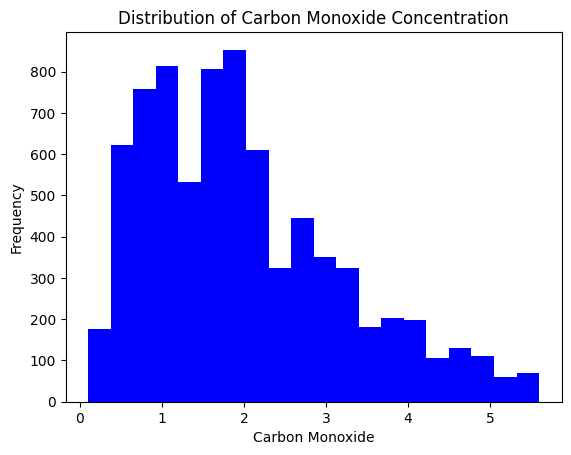

In [ ]:
import matplotlib.pyplot as plt

plt.hist(air_quality_api_2['Carbon Monoxide'], bins=20, color='blue')
plt.title('Distribution of Carbon Monoxide Concentration')
plt.xlabel('Carbon Monoxide')
plt.ylabel('Frequency')
plt.show()


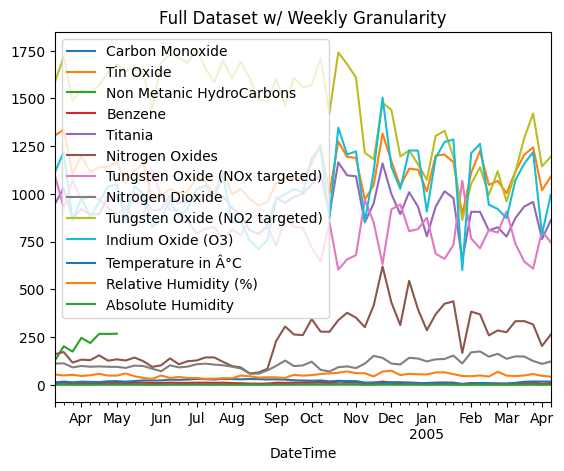

In [ ]:
air_quality_api.set_index('DateTime', inplace=True)
weekly = air_quality_api.resample('W').mean()
weekly.plot(title = "Full Dataset w/ Weekly Granularity")
plt.show()

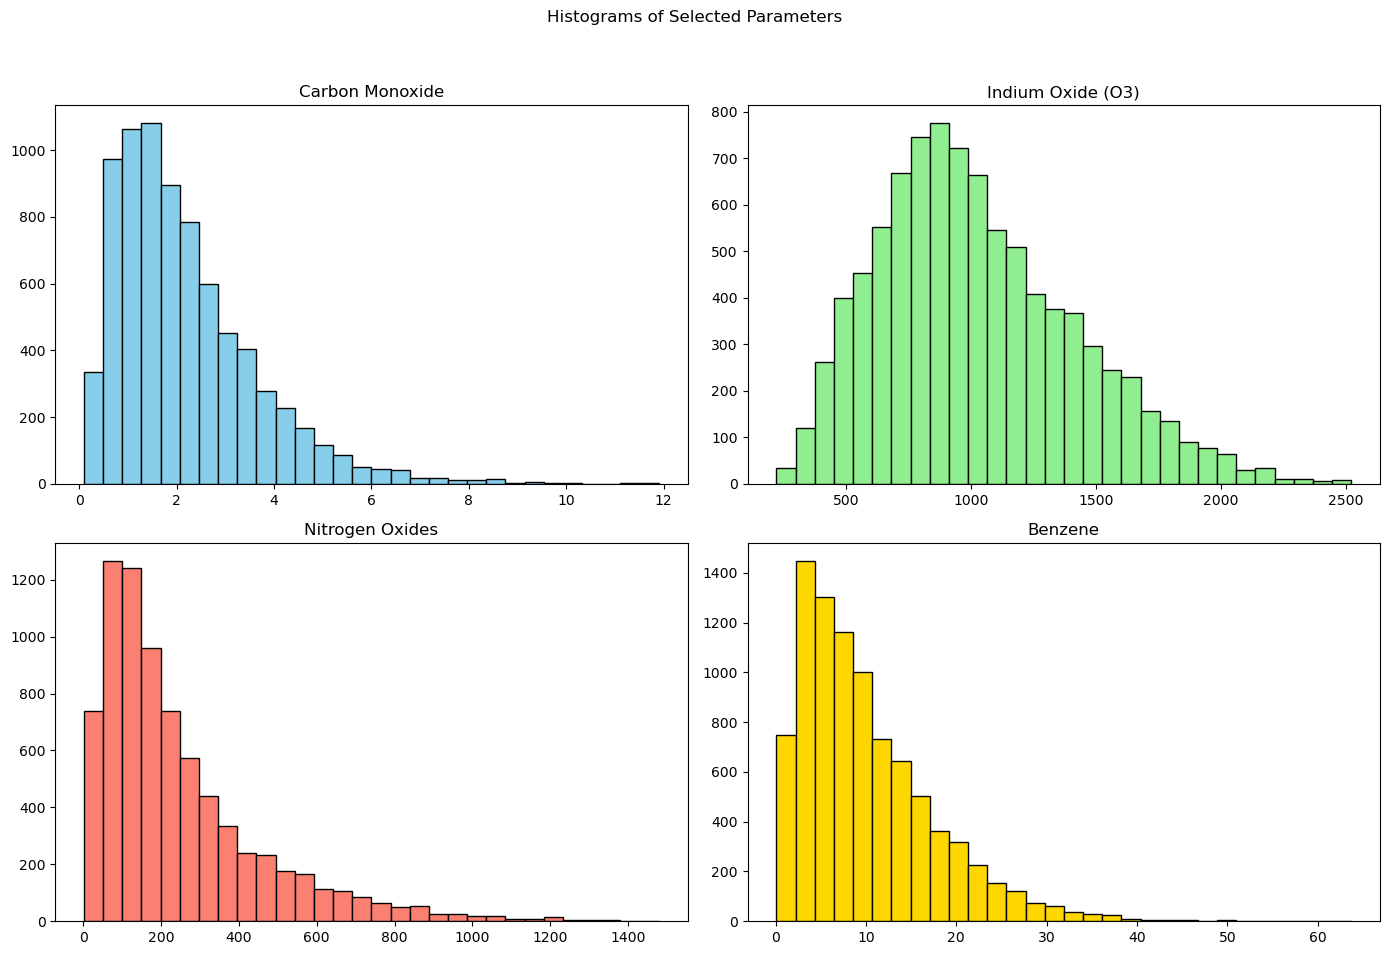

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Histograms of Selected Parameters')

# Carbon Monoxide
axes[0, 0].hist(air_quality_api['Carbon Monoxide'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Carbon Monoxide')

# Indium Oxide (O3)
axes[0, 1].hist(air_quality_api['Indium Oxide (O3)'], bins=30, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Indium Oxide (O3)')

# Nitrogen Oxides
axes[1, 0].hist(air_quality_api['Nitrogen Oxides'], bins=30, color='salmon', edgecolor='black')
axes[1, 0].set_title('Nitrogen Oxides')

# Benzene
axes[1, 1].hist(air_quality_api['Benzene'], bins=30, color='gold', edgecolor='black')
axes[1, 1].set_title('Benzene')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


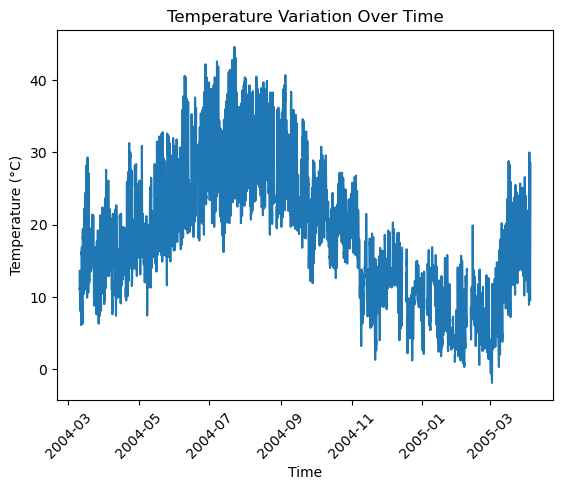

In [ ]:
#air_quality_api['DateTime']
plt.plot(air_quality_api.reset_index()['DateTime'], air_quality_api['Temperature in Â°C'])
plt.title('Temperature Variation Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.show()


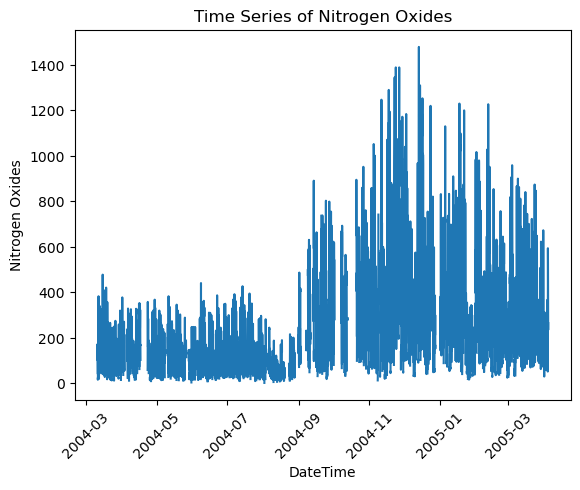

In [ ]:
plt.plot(air_quality_api.reset_index()['DateTime'], air_quality_api['Nitrogen Oxides'])
plt.title('Time Series of Nitrogen Oxides')
plt.xlabel('DateTime')
plt.ylabel('Nitrogen Oxides')
plt.xticks(rotation=45)
plt.show()


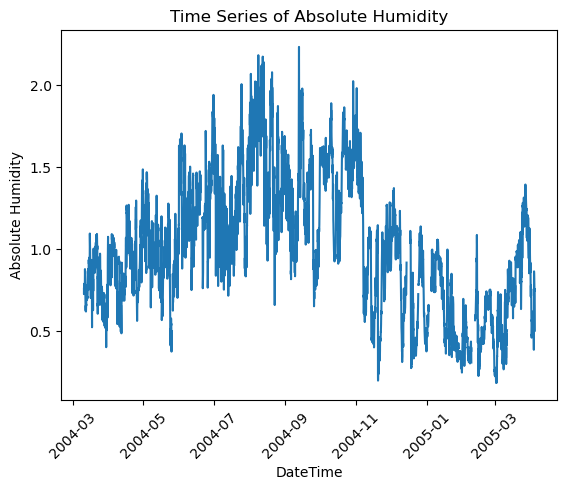

In [ ]:
plt.plot(air_quality_api.reset_index()['DateTime'], air_quality_api['Absolute Humidity'])
plt.title('Time Series of Absolute Humidity')
plt.xlabel('DateTime')
plt.ylabel('Absolute Humidity')
plt.xticks(rotation=45)
plt.show()


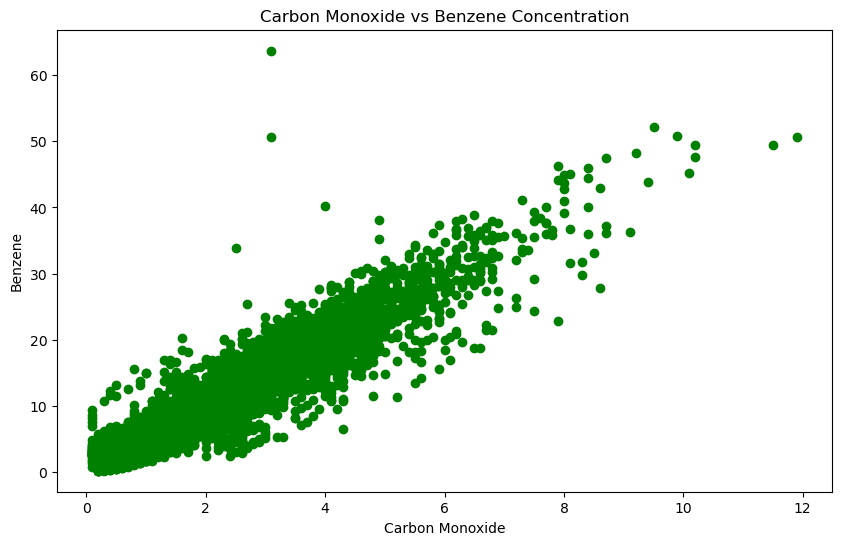

In [ ]:
# Scatter plot of Carbon Monoxide vs Benzene
plt.figure(figsize=(10,6))
plt.scatter(air_quality_api['Carbon Monoxide'], air_quality_api['Benzene'], color='green')
plt.title('Carbon Monoxide vs Benzene Concentration')
plt.xlabel('Carbon Monoxide')
plt.ylabel('Benzene')
plt.show()


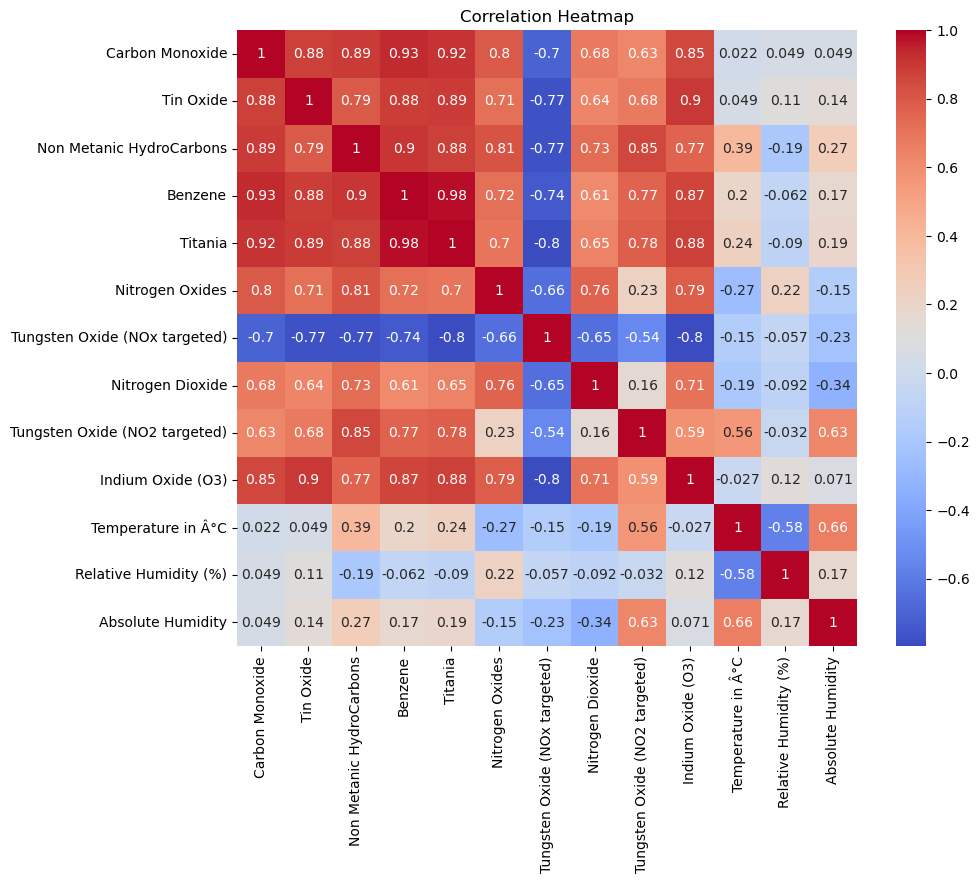

In [ ]:
import seaborn as sns
import numpy as np

# Ensure numerical columns for the correlation matrix
df_numeric = air_quality_api.select_dtypes(include=[np.float64])
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# **PCA**

In [ ]:
air_quality_api.dtypes

Carbon Monoxide                         float64
Tin Oxide                               float64
Non Metanic HydroCarbons                float64
Benzene                                 float64
Titania                                 float64
Nitrogen Oxides                         float64
Tungsten Oxide (NOx targeted)           float64
Nitrogen Dioxide                        float64
Tungsten Oxide (NO2 targeted)           float64
Indium Oxide (O3)                       float64
Temperature in Â°C                      float64
Relative Humidity (%)                   float64
Absolute Humidity                       float64
DateTime                         datetime64[ns]
dtype: object

In [ ]:
air_quality_api.columns

Index(['Carbon Monoxide', 'Tin Oxide', 'Non Metanic HydroCarbons', 'Benzene',
       'Titania', 'Nitrogen Oxides', 'Tungsten Oxide (NOx targeted)',
       'Nitrogen Dioxide', 'Tungsten Oxide (NO2 targeted)',
       'Indium Oxide (O3)', 'Temperature in Â°C', 'Relative Humidity (%)',
       'Absolute Humidity', 'DateTime'],
      dtype='object')

AQI

In [ ]:
import pandas as pd

# function to calculate AQI for O3
def calculate_aqi_o3(o3_concentration):

    breakpoints = [0,450, 750, 1500, 2500, 3500, 4500,6000]
    aqi_values = [0, 50, 100, 150, 200,  300, 400, 500]

    aqi_low = 0
    aqi_high = 0
    conc_low = 0
    conc_high = 0

    for i in range(len(breakpoints) - 1):
        if breakpoints[i] <= o3_concentration <= breakpoints[i + 1]:
            aqi_low = aqi_values[i]
            aqi_high = aqi_values[i + 1]
            conc_low = breakpoints[i]
            conc_high = breakpoints[i + 1]
            break
    if conc_high - conc_low == 0:
      return aqi_low

    aqi = ((aqi_high - aqi_low) / (conc_high - conc_low)) * (o3_concentration - conc_low) + aqi_low
    return round(aqi)


air_quality_api['O3_AQI'] = air_quality_api['Indium Oxide (O3)'].apply(calculate_aqi_o3)
air_quality_api


Carbon Monoxide  Tin Oxide  Non Metanic HydroCarbons  Benzene  Titania  \
0                 2.6     1360.0                     150.0     11.9   1046.0   
1                 2.0     1292.0                     112.0      9.4    955.0   
2                 2.2     1402.0                      88.0      9.0    939.0   
3                 2.2     1376.0                      80.0      9.2    948.0   
4                 1.6     1272.0                      51.0      6.5    836.0   
...               ...        ...                       ...      ...      ...   
9352              3.1     1314.0                       NaN     13.5   1101.0   
9353              2.4     1163.0                       NaN     11.4   1027.0   
9354              2.4     1142.0                       NaN     12.4   1063.0   
9355              2.1     1003.0                       NaN      9.5    961.0   
9356              2.2     1071.0                       NaN     11.9   1047.0   

      Nitrogen Oxides  Tungsten Oxide (NOx targeted)  Nitrogen Dioxide  \
0               166.0                         1056.0             113.0   
1               103.0                         1174.0              92.0   
2               131.0                         1140.0             114.0   
3               172.0                         1092.0             122.0   
4               131.0                         1205.0             116.0   
...               ...                            ...               ...   
9352            472.0                          539.0             190.0   
9353            353.0                          604.0             179.0   
9354            293.0                          603.0             175.0   
9355            235.0                          702.0             156.0   
9356            265.0                          654.0             168.0   

      Tungsten Oxide (NO2 targeted)  Indium Oxide (O3)  Temperature in Â°C  \
0                            1692.0             1268.0                13.6   
1                            1559.0              972.0                13.3   
2                            1555.0             1074.0                11.9   
3                            1584.0             1203.0                11.0   
4                            1490.0             1110.0                11.2   
...                             ...                ...                 ...   
9352                         1374.0             1729.0                21.9   
9353                         1264.0             1269.0                24.3   
9354                         1241.0             1092.0                26.9   
9355                         1041.0              770.0                28.3   
9356                         1129.0              816.0                28.5   

      Relative Humidity (%)  Absolute Humidity            DateTime  O3_AQI  
0                      48.9             0.7578 2004-03-10 18:00:00     135  
1                      47.7             0.7255 2004-03-10 19:00:00     115  
2                      54.0             0.7502 2004-03-10 20:00:00     122  
3                      60.0             0.7867 2004-03-10 21:00:00     130  
4                      59.6             0.7888 2004-03-10 22:00:00     124  
...                     ...                ...                 ...     ...  
9352                   29.3             0.7568 2005-04-04 10:00:00     161  
9353                   23.7             0.7119 2005-04-04 11:00:00     135  
9354                   18.3             0.6406 2005-04-04 12:00:00     123  
9355                   13.5             0.5139 2005-04-04 13:00:00     101  
9356                   13.1             0.5028 2005-04-04 14:00:00     104  

[9357 rows x 15 columns]

In [ ]:
air_quality_api=air_quality_api.reset_index()
air_quality_api.set_index('DateTime', inplace=True)
air_quality_api = air_quality_api.interpolate(method='time') #using interpolation to fill in the missing values
air_quality_api=air_quality_api.reset_index()
air_quality_api.isnull().sum()

DateTime                         0
index                            0
Carbon Monoxide                  0
Tin Oxide                        0
Non Metanic HydroCarbons         0
Benzene                          0
Titania                          0
Nitrogen Oxides                  0
Tungsten Oxide (NOx targeted)    0
Nitrogen Dioxide                 0
Tungsten Oxide (NO2 targeted)    0
Indium Oxide (O3)                0
Temperature in Â°C               0
Relative Humidity (%)            0
Absolute Humidity                0
O3_AQI                           0
dtype: int64

In [ ]:
bins = [0, 50, 100, 200,250]
labels = ['Good', 'Satisfactory', 'Moderately polluted','Poor']
air_quality_api['AQI_Category'] = pd.cut(air_quality_api['O3_AQI'], bins=bins, labels=labels, include_lowest=True)

air_quality_api.head()

DateTime  index  Carbon Monoxide  Tin Oxide  \
0 2004-03-10 18:00:00      0              2.6     1360.0   
1 2004-03-10 19:00:00      1              2.0     1292.0   
2 2004-03-10 20:00:00      2              2.2     1402.0   
3 2004-03-10 21:00:00      3              2.2     1376.0   
4 2004-03-10 22:00:00      4              1.6     1272.0   

   Non Metanic HydroCarbons  Benzene  Titania  Nitrogen Oxides  \
0                     150.0     11.9   1046.0            166.0   
1                     112.0      9.4    955.0            103.0   
2                      88.0      9.0    939.0            131.0   
3                      80.0      9.2    948.0            172.0   
4                      51.0      6.5    836.0            131.0   

   Tungsten Oxide (NOx targeted)  Nitrogen Dioxide  \
0                         1056.0             113.0   
1                         1174.0              92.0   
2                         1140.0             114.0   
3                         1092.0             122.0   
4                         1205.0             116.0   

   Tungsten Oxide (NO2 targeted)  Indium Oxide (O3)  Temperature in Â°C  \
0                         1692.0             1268.0                13.6   
1                         1559.0              972.0                13.3   
2                         1555.0             1074.0                11.9   
3                         1584.0             1203.0                11.0   
4                         1490.0             1110.0                11.2   

   Relative Humidity (%)  Absolute Humidity  O3_AQI         AQI_Category  
0                   48.9             0.7578     135  Moderately polluted  
1                   47.7             0.7255     115  Moderately polluted  
2                   54.0             0.7502     122  Moderately polluted  
3                   60.0             0.7867     130  Moderately polluted  
4                   59.6             0.7888     124  Moderately polluted

In [ ]:
air_quality_api

DateTime  index  Carbon Monoxide  Tin Oxide  \
0    2004-03-10 18:00:00      0              2.6     1360.0   
1    2004-03-10 19:00:00      1              2.0     1292.0   
2    2004-03-10 20:00:00      2              2.2     1402.0   
3    2004-03-10 21:00:00      3              2.2     1376.0   
4    2004-03-10 22:00:00      4              1.6     1272.0   
...                  ...    ...              ...        ...   
9352 2005-04-04 10:00:00   9352              3.1     1314.0   
9353 2005-04-04 11:00:00   9353              2.4     1163.0   
9354 2005-04-04 12:00:00   9354              2.4     1142.0   
9355 2005-04-04 13:00:00   9355              2.1     1003.0   
9356 2005-04-04 14:00:00   9356              2.2     1071.0   

      Non Metanic HydroCarbons  Benzene  Titania  Nitrogen Oxides  \
0                        150.0     11.9   1046.0            166.0   
1                        112.0      9.4    955.0            103.0   
2                         88.0      9.0    939.0            131.0   
3                         80.0      9.2    948.0            172.0   
4                         51.0      6.5    836.0            131.0   
...                        ...      ...      ...              ...   
9352                     275.0     13.5   1101.0            472.0   
9353                     275.0     11.4   1027.0            353.0   
9354                     275.0     12.4   1063.0            293.0   
9355                     275.0      9.5    961.0            235.0   
9356                     275.0     11.9   1047.0            265.0   

      Tungsten Oxide (NOx targeted)  Nitrogen Dioxide  \
0                            1056.0             113.0   
1                            1174.0              92.0   
2                            1140.0             114.0   
3                            1092.0             122.0   
4                            1205.0             116.0   
...                             ...               ...   
9352                          539.0             190.0   
9353                          604.0             179.0   
9354                          603.0             175.0   
9355                          702.0             156.0   
9356                          654.0             168.0   

      Tungsten Oxide (NO2 targeted)  Indium Oxide (O3)  Temperature in Â°C  \
0                            1692.0             1268.0                13.6   
1                            1559.0              972.0                13.3   
2                            1555.0             1074.0                11.9   
3                            1584.0             1203.0                11.0   
4                            1490.0             1110.0                11.2   
...                             ...                ...                 ...   
9352                         1374.0             1729.0                21.9   
9353                         1264.0             1269.0                24.3   
9354                         1241.0             1092.0                26.9   
9355                         1041.0              770.0                28.3   
9356                         1129.0              816.0                28.5   

      Relative Humidity (%)  Absolute Humidity  O3_AQI         AQI_Category  
0                      48.9             0.7578     135  Moderately polluted  
1                      47.7             0.7255     115  Moderately polluted  
2                      54.0             0.7502     122  Moderately polluted  
3                      60.0             0.7867     130  Moderately polluted  
4                      59.6             0.7888     124  Moderately polluted  
...                     ...                ...     ...                  ...  
9352                   29.3             0.7568     161  Moderately polluted  
9353                   23.7             0.7119     135  Moderately polluted  
9354                   18.3             0.6406     123  Moderately polluted  
9355                   13.5 

In [ ]:
air_quality_api.columns

Index(['DateTime', 'index', 'Carbon Monoxide', 'Tin Oxide',
       'Non Metanic HydroCarbons', 'Benzene', 'Titania', 'Nitrogen Oxides',
       'Tungsten Oxide (NOx targeted)', 'Nitrogen Dioxide',
       'Tungsten Oxide (NO2 targeted)', 'Indium Oxide (O3)',
       'Temperature in Â°C', 'Relative Humidity (%)', 'Absolute Humidity',
       'O3_AQI', 'AQI_Category'],
      dtype='object')

In [ ]:
air_quality_api.shape

(9357, 17)

In [ ]:
air_quality_api.dtypes

DateTime                         datetime64[ns]
index                                     int64
Carbon Monoxide                         float64
Tin Oxide                               float64
Non Metanic HydroCarbons                float64
Benzene                                 float64
Titania                                 float64
Nitrogen Oxides                         float64
Tungsten Oxide (NOx targeted)           float64
Nitrogen Dioxide                        float64
Tungsten Oxide (NO2 targeted)           float64
Indium Oxide (O3)                       float64
Temperature in Â°C                      float64
Relative Humidity (%)                   float64
Absolute Humidity                       float64
O3_AQI                                    int64
AQI_Category                           category
dtype: object

In [ ]:
air_quality_api.value_counts("AQI_Category")

AQI_Category
Moderately polluted    6505
Satisfactory           2058
Good                    790
Poor                      4
Name: count, dtype: int64

In [ ]:
air_quality_api.to_csv('air_quality_clean_output.csv', index=False)

In [ ]:
air_quality_api.dtypes

DateTime                         datetime64[ns]
index                                     int64
Carbon Monoxide                         float64
Tin Oxide                               float64
Non Metanic HydroCarbons                float64
Benzene                                 float64
Titania                                 float64
Nitrogen Oxides                         float64
Tungsten Oxide (NOx targeted)           float64
Nitrogen Dioxide                        float64
Tungsten Oxide (NO2 targeted)           float64
Indium Oxide (O3)                       float64
Temperature in Â°C                      float64
Relative Humidity (%)                   float64
Absolute Humidity                       float64
O3_AQI                                    int64
AQI_Category                           category
dtype: object

In [ ]:
air_quality_api_1=air_quality_api[['Carbon Monoxide', 'Tin Oxide', 'Non Metanic HydroCarbons', 'Benzene',
       'Titania', 'Nitrogen Oxides', 'Tungsten Oxide (NOx targeted)',
       'Nitrogen Dioxide', 'Tungsten Oxide (NO2 targeted)',
       'Indium Oxide (O3)', 'Temperature in Â°C', 'Relative Humidity (%)',
       'Absolute Humidity','O3_AQI']]

##**PCA**

In [ ]:
from sklearn.decomposition import PCA, IncrementalPCA
scaler = StandardScaler()
air_quality_api_scalar = scaler.fit_transform(air_quality_api_1)

In [ ]:
air_quality_api_normalized_df = pd.DataFrame(air_quality_api_scalar, columns=air_quality_api_1.columns)
air_quality_api_normalized_df.head()

Carbon Monoxide  Tin Oxide  Non Metanic HydroCarbons   Benzene   Titania  \
0         0.327869   1.177627                 -1.613973  0.229342  0.387741   
1        -0.091225   0.865965                 -2.125772 -0.103840  0.048002   
2         0.048473   1.370125                 -2.449012 -0.157149 -0.011733   
3         0.048473   1.250960                 -2.556759 -0.130495  0.021868   
4        -0.370621   0.774299                 -2.947342 -0.490331 -0.396273   

   Nitrogen Oxides  Tungsten Oxide (NOx targeted)  Nitrogen Dioxide  \
0        -0.371614                       0.873072          0.072491   
1        -0.679977                       1.334557         -0.379513   
2        -0.542927                       1.201587          0.094015   
3        -0.342246                       1.013864          0.266206   
4        -0.542927                       1.455795          0.137063   

   Tungsten Oxide (NO2 targeted)  Indium Oxide (O3)  Temperature in Â°C  \
0                       0.695541           0.582197           -0.527644   
1                       0.307998          -0.149704           -0.561807   
2                       0.296343           0.102505           -0.721236   
3                       0.380845           0.421476           -0.823727   
4                       0.106942           0.191520           -0.800951   

   Relative Humidity (%)  Absolute Humidity    O3_AQI  
0              -0.016947          -0.651002  0.682940  
1              -0.086741          -0.731314  0.162786  
2               0.279675          -0.669899  0.344840  
3               0.628642          -0.579144  0.552902  
4               0.605378          -0.573922  0.396856

In [ ]:
# Fit PCA with 2 components
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(air_quality_api_scalar)

explained_variance_2 = pca_2.explained_variance_ratio_.sum()
print(f'Information retained in 2D PCA: {explained_variance_2 * 100:.2f}%')
print(X_pca_2)

Information retained in 2D PCA: 69.63%
[[ 0.70362321 -0.40645675]
 [-0.68642335 -0.36757302]
 [-0.19745175 -0.75638046]
 ...
 [ 1.06237899 -0.18854337]
 [-0.40550793 -0.19431822]
 [ 0.24492424 -0.17180647]]


In [ ]:
pca_2_df = pd.DataFrame(X_pca_2, columns=['PC1', 'PC2'])
pca_2_df

PC1       PC2
0     0.703623 -0.406457
1    -0.686423 -0.367573
2    -0.197452 -0.756380
3     0.129201 -0.944331
4    -0.910180 -0.964343
...        ...       ...
9352  2.928745 -0.866255
9353  1.364388 -0.484311
9354  1.062379 -0.188543
9355 -0.405508 -0.194318
9356  0.244924 -0.171806

[9357 rows x 2 columns]

In [ ]:
# Fit PCA with 3 components
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(air_quality_api_scalar)

explained_variance_3 = pca_3.explained_variance_ratio_.sum()
print(f'Information retained in 3D PCA: {explained_variance_3 * 100:.2f}%')
print(X_pca_3)

Information retained in 3D PCA: 79.33%
[[ 0.70362321 -0.40645675  0.27459868]
 [-0.68642335 -0.36757302  0.26836838]
 [-0.19745175 -0.75638046  0.61116645]
 ...
 [ 1.06237899 -0.18854337 -2.4985988 ]
 [-0.40550793 -0.19431822 -2.95773074]
 [ 0.24492424 -0.17180647 -3.03479768]]


In [ ]:
pca_3_df = pd.DataFrame(X_pca_3, columns=['PC1', 'PC2', 'PC3'])
pca_3_df

PC1       PC2       PC3
0     0.703623 -0.406457  0.274599
1    -0.686423 -0.367573  0.268368
2    -0.197452 -0.756380  0.611166
3     0.129201 -0.944331  0.967378
4    -0.910180 -0.964343  0.996910
...        ...       ...       ...
9352  2.928745 -0.866255 -1.537917
9353  1.364388 -0.484311 -2.029828
9354  1.062379 -0.188543 -2.498599
9355 -0.405508 -0.194318 -2.957731
9356  0.244924 -0.171806 -3.034798

[9357 rows x 3 columns]

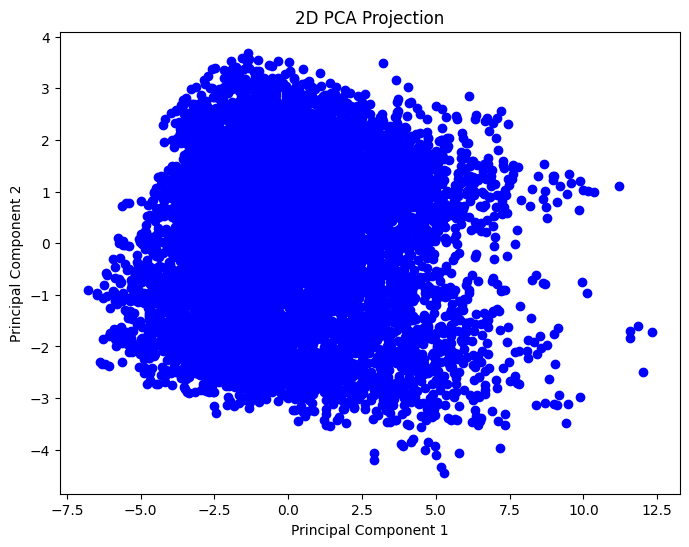

In [ ]:
#plot

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c='blue', marker='o')
plt.title('2D PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

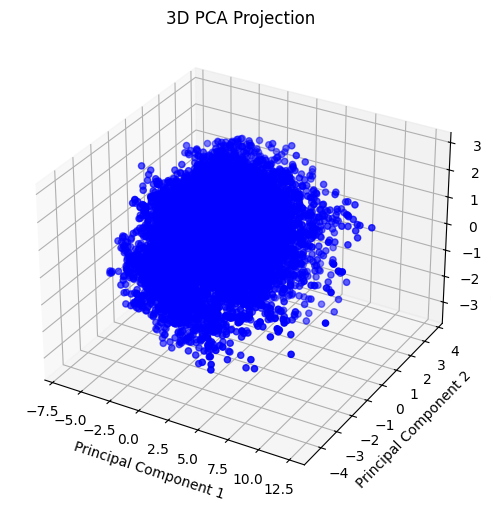

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2], c='blue', marker='o')
ax.set_title('3D PCA Projection')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()


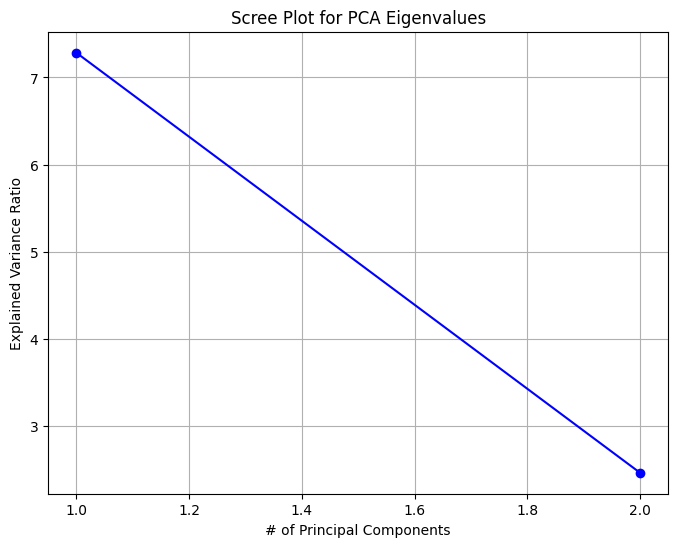

In [ ]:
# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(pca_2.explained_variance_) + 1), pca_2.explained_variance_, marker='o', linestyle='-', color='blue')
plt.xlabel('# of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot for PCA Eigenvalues')
plt.grid(True)
plt.show()


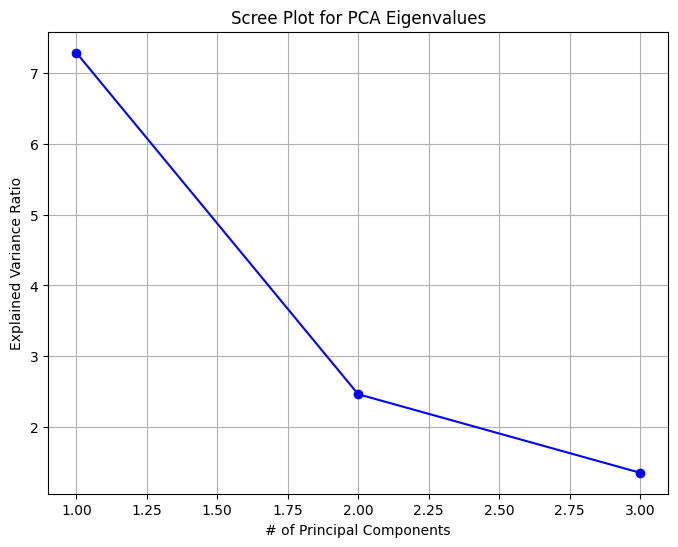

In [ ]:
# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(pca_3.explained_variance_) + 1), pca_3.explained_variance_, marker='o', linestyle='-', color='blue')
plt.xlabel('# of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot for PCA Eigenvalues')
plt.grid(True)
plt.show()

In [ ]:
pca_full = PCA().fit(air_quality_api_scalar)
cumulative_variance = pca_full.explained_variance_ratio_.cumsum()
dimensions_needed = next(i for i, cumulative in enumerate(cumulative_variance) if cumulative >= 0.95)

print(f'Number of dimensions to retain 95% of the data: {dimensions_needed + 1}')


Number of dimensions to retain 95% of the data: 7


In [ ]:
eigenvalues = pca_full.explained_variance_[:3]
print(f'Top three eigenvalues: {eigenvalues}')

Top three eigenvalues: [7.28324744 2.46631611 1.3584858 ]


### **CLUSTERING**

### **K-Means**

For k=2, the silhouette score is: 0.3683881263815616
For k=3, the silhouette score is: 0.27538207727117164
For k=4, the silhouette score is: 0.2793092754216223
For k=5, the silhouette score is: 0.26509793698436934
For k=6, the silhouette score is: 0.25470961326601316
For k=7, the silhouette score is: 0.2581464563661913


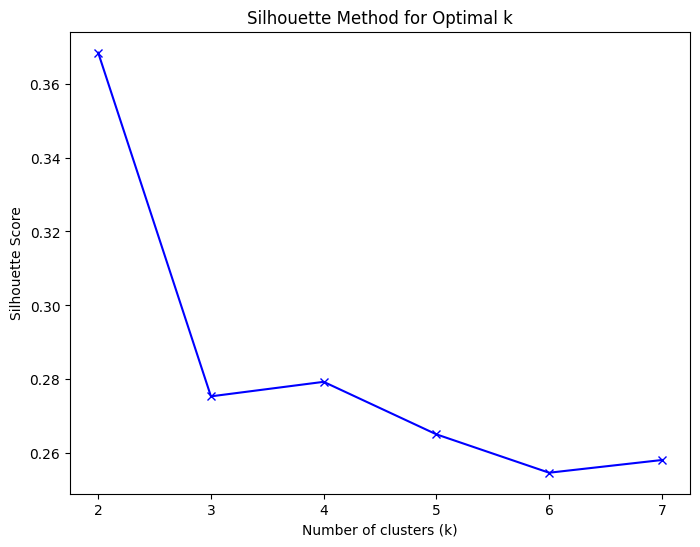

Top 3 k-values based on silhouette scores: [2, 3, 4]


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

k_values = range(2, 8)

silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca_3)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_pca_3, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For k={k}, the silhouette score is: {silhouette_avg}")

plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()


top_k_indices = np.argsort(silhouette_scores)[-3:]
best_k_values = [k_values[i] for i in top_k_indices]
best_k_values.sort()
print(f"Top 3 k-values based on silhouette scores: {best_k_values}")

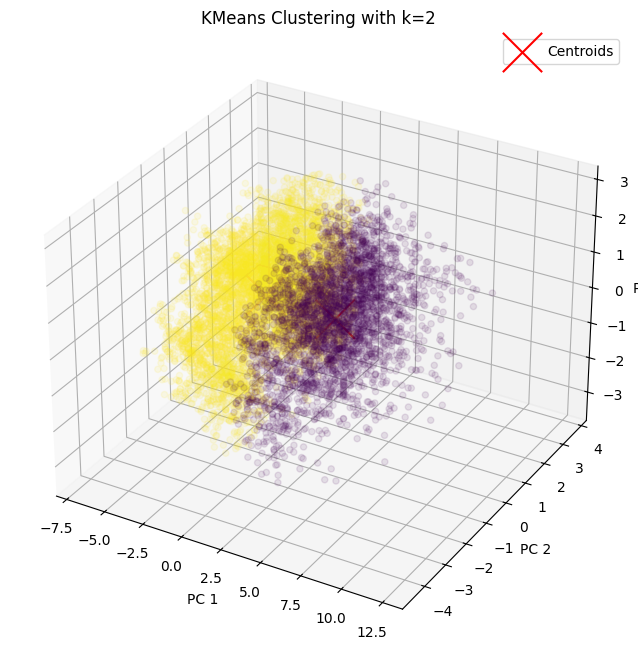

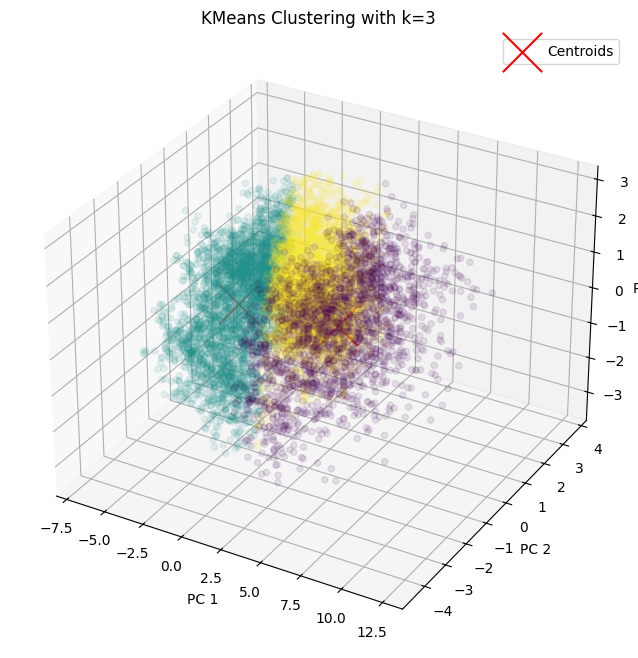

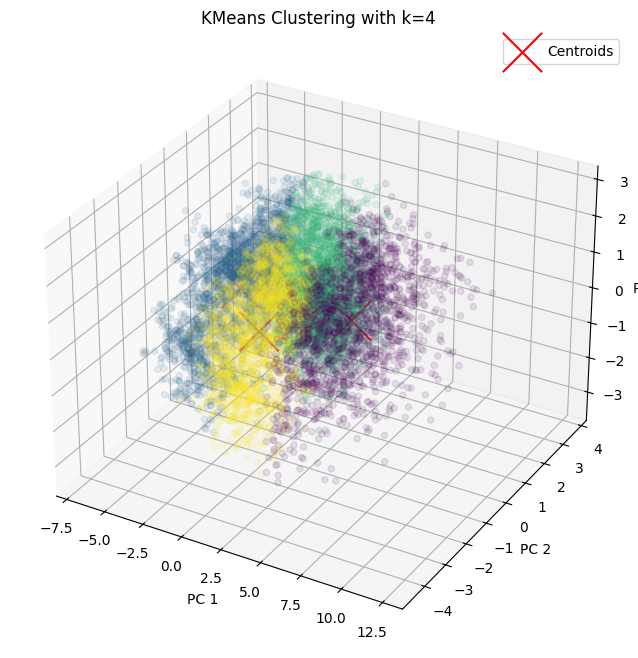

In [ ]:
for i, k in enumerate(best_k_values):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca_3)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_


    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')


    ax.scatter(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2], c=labels, cmap='viridis', marker='o', alpha=0.1)

    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='x', s=800, label='Centroids')

    ax.set_title(f'KMeans Clustering with k={k}')
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
    ax.set_zlabel('PC 3')

    plt.legend()
    plt.show()


### hierarchal Clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import AgglomerativeClustering

In [ ]:
linkage_data = linkage(X_pca_3, method='ward', metric='euclidean')
dendrogram(linkage_data)

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [45.0, 45.0, 62.5, 62.5],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [92.5, 92.5, 122.5, 122.5],
  [53.75, 53.75, 107.5, 107.5],
  [13.75, 13.75, 80.625, 80.625],
  [145.0, 145.0, 155.0, 155.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [150.0, 150.0, 172.5, 172.5],
  [195.0, 195.0, 205.0, 205.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [200.0, 200.0, 222.5, 222.5],
  [245.0, 245.0, 255.0, 255.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [250.0, 250.0, 272.5, 272.5],
  [211.25, 211.25, 261.25, 261.25],
  [161.25, 161.25, 236.25, 236.25],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [295.0, 295.0, 312.5, 312.5],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360

C:\Users\91967\AppData\Local\Temp\ipykernel_3604\58827670.py:13: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(cosine_distances, method='average')


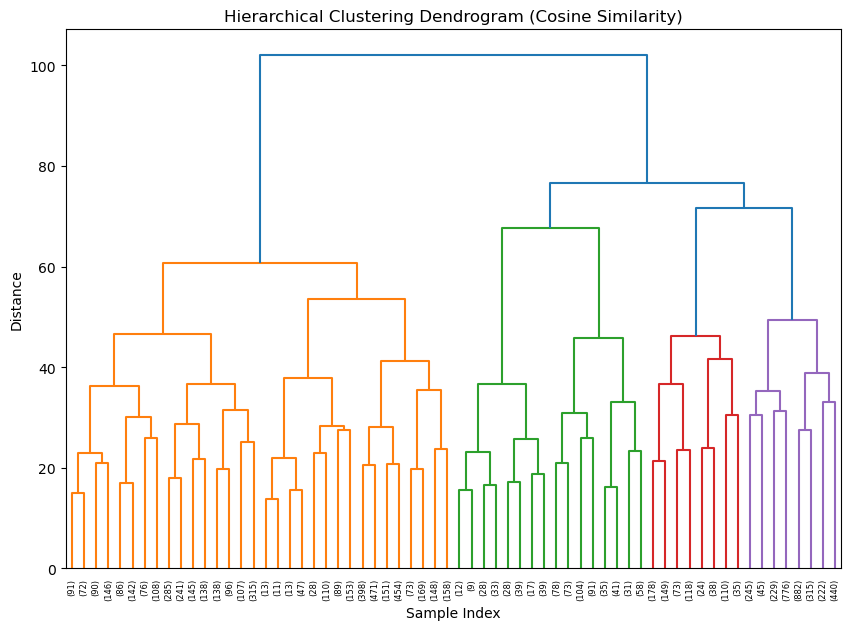

C:\Users\91967\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


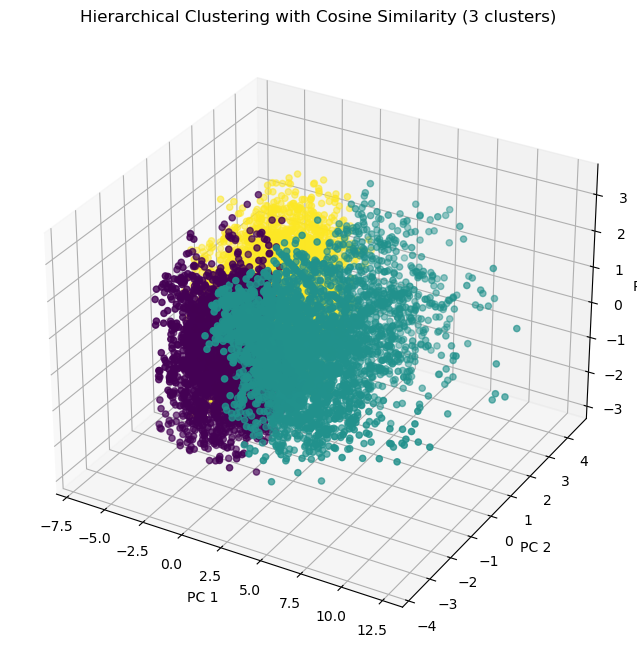

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

cosine_distances = pairwise_distances(X_pca_3, metric='cosine')

linked = linkage(cosine_distances, method='average')


plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (Cosine Similarity)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

agglom_cluster_cosine = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='average')
labels_hierarchical_cosine = agglom_cluster_cosine.fit_predict(X_pca_3)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2], c=labels_hierarchical_cosine, cmap='viridis', marker='o')
ax.set_title('Hierarchical Clustering with Cosine Similarity (3 clusters)')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

plt.show()


### DB-Scan


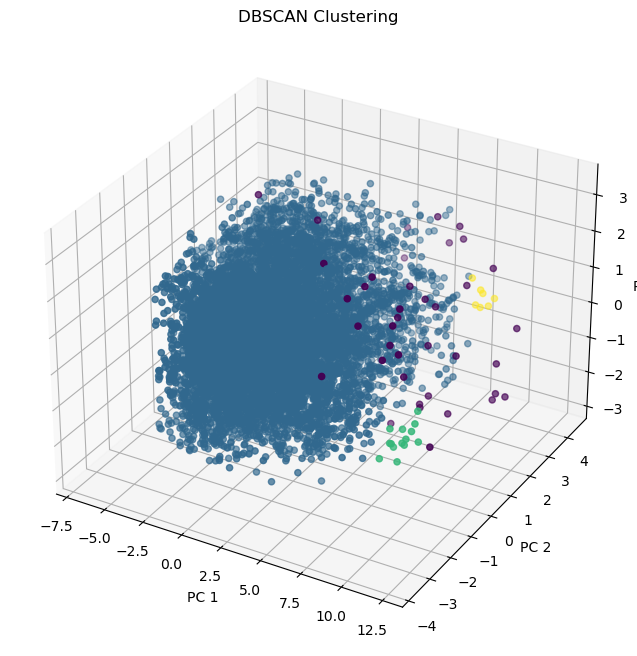

Number of clusters found: 3
Number of noise points (outliers): 39


In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


dbscan = DBSCAN(eps=0.8, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_pca_3)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2], c=labels_dbscan, cmap='viridis', marker='o')
ax.set_title('DBSCAN Clustering')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

plt.show()

n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise = list(labels_dbscan).count(-1)

print(f'Number of clusters found: {n_clusters}')
print(f'Number of noise points (outliers): {n_noise}')


### ARM


In [ ]:
air_quality_api.head()

DateTime  Carbon Monoxide  Tin Oxide  Non Metanic HydroCarbons  \
0 2004-03-10 18:00:00              2.6     1360.0                     150.0   
1 2004-03-10 19:00:00              2.0     1292.0                     112.0   
2 2004-03-10 20:00:00              2.2     1402.0                      88.0   
3 2004-03-10 21:00:00              2.2     1376.0                      80.0   
4 2004-03-10 22:00:00              1.6     1272.0                      51.0   

   Benzene  Titania  Nitrogen Oxides  Tungsten Oxide (NOx targeted)  \
0     11.9   1046.0            166.0                         1056.0   
1      9.4    955.0            103.0                         1174.0   
2      9.0    939.0            131.0                         1140.0   
3      9.2    948.0            172.0                         1092.0   
4      6.5    836.0            131.0                         1205.0   

   Nitrogen Dioxide  Tungsten Oxide (NO2 targeted)  Indium Oxide (O3)  \
0             113.0                         1692.0             1268.0   
1              92.0                         1559.0              972.0   
2             114.0                         1555.0             1074.0   
3             122.0                         1584.0             1203.0   
4             116.0                         1490.0             1110.0   

   Temperature in Â°C  Relative Humidity (%)  Absolute Humidity  O3_AQI  \
0                13.6                   48.9             0.7578     135   
1                13.3                   47.7             0.7255     115   
2                11.9                   54.0             0.7502     122   
3                11.0                   60.0             0.7867     130   
4                11.2                   59.6             0.7888     124   

          AQI_Category  
0  Moderately polluted  
1  Moderately polluted  
2  Moderately polluted  
3  Moderately polluted  
4  Moderately polluted

In [ ]:
data = air_quality_api

for col in ['Carbon Monoxide', 'Tin Oxide', 'Non Metanic HydroCarbons', 'Benzene',
            'Titania', 'Nitrogen Oxides', 'Tungsten Oxide (NOx targeted)', 'Nitrogen Dioxide',
            'Tungsten Oxide (NO2 targeted)', 'Indium Oxide (O3)', 'Temperature in Â°C',
            'Relative Humidity (%)', 'Absolute Humidity']:
    threshold = data[col].mean()
    data[col] = (data[col] > threshold).astype(int)

data.head()


DateTime  Carbon Monoxide  Tin Oxide  Non Metanic HydroCarbons  \
0 2004-03-10 18:00:00                1          1                         0   
1 2004-03-10 19:00:00                0          1                         0   
2 2004-03-10 20:00:00                1          1                         0   
3 2004-03-10 21:00:00                1          1                         0   
4 2004-03-10 22:00:00                0          1                         0   

   Benzene  Titania  Nitrogen Oxides  Tungsten Oxide (NOx targeted)  \
0        1        1                0                              1   
1        0        1                0                              1   
2        0        0                0                              1   
3        0        1                0                              1   
4        0        0                0                              1   

   Nitrogen Dioxide  Tungsten Oxide (NO2 targeted)  Indium Oxide (O3)  \
0                 1                              1                  1   
1                 0                              1                  0   
2                 1                              1                  1   
3                 1                              1                  1   
4                 1                              1                  1   

   Temperature in Â°C  Relative Humidity (%)  Absolute Humidity  O3_AQI  \
0                   0                      0                  0     135   
1                   0                      0                  0     115   
2                   0                      1                  0     122   
3                   0                      1                  0     130   
4                   0                      1                  0     124   

          AQI_Category  
0  Moderately polluted  
1  Moderately polluted  
2  Moderately polluted  
3  Moderately polluted  
4  Moderately polluted

In [ ]:
data.dtypes

DateTime                         datetime64[ns]
Carbon Monoxide                           int32
Tin Oxide                                 int32
Non Metanic HydroCarbons                  int32
Benzene                                   int32
Titania                                   int32
Nitrogen Oxides                           int32
Tungsten Oxide (NOx targeted)             int32
Nitrogen Dioxide                          int32
Tungsten Oxide (NO2 targeted)             int32
Indium Oxide (O3)                         int32
Temperature in Â°C                        int32
Relative Humidity (%)                     int32
Absolute Humidity                         int32
O3_AQI                                    int64
AQI_Category                           category
dtype: object

In [ ]:
arm_data = data.drop(columns=['DateTime', 'O3_AQI', 'AQI_Category'])
arm_data.head()


Carbon Monoxide  Tin Oxide  Non Metanic HydroCarbons  Benzene  Titania  \
0                1          1                         0        1        1   
1                0          1                         0        0        1   
2                1          1                         0        0        0   
3                1          1                         0        0        1   
4                0          1                         0        0        0   

   Nitrogen Oxides  Tungsten Oxide (NOx targeted)  Nitrogen Dioxide  \
0                0                              1                 1   
1                0                              1                 0   
2                0                              1                 1   
3                0                              1                 1   
4                0                              1                 1   

   Tungsten Oxide (NO2 targeted)  Indium Oxide (O3)  Temperature in Â°C  \
0                              1                  1                   0   
1                              1                  0                   0   
2                              1                  1                   0   
3                              1                  1                   0   
4                              1                  1                   0   

   Relative Humidity (%)  Absolute Humidity  
0                      0                  0  
1                      0                  0  
2                      1                  0  
3                      1                  0  
4                      1                  0

In [ ]:
arm_data.dtypes

Carbon Monoxide                  int32
Tin Oxide                        int32
Non Metanic HydroCarbons         int32
Benzene                          int32
Titania                          int32
Nitrogen Oxides                  int32
Tungsten Oxide (NOx targeted)    int32
Nitrogen Dioxide                 int32
Tungsten Oxide (NO2 targeted)    int32
Indium Oxide (O3)                int32
Temperature in Â°C               int32
Relative Humidity (%)            int32
Absolute Humidity                int32
dtype: object

In [ ]:
!pip install mlxtend


  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 330.3 kB/s eta 0:00:05
   - -------------------------------------- 0.0/1.4 MB 393.8 kB/s eta 0:00:04
   ----- ---------------------------------- 0.2/1.4 MB 1.6 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.4 MB 7.0 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 6.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(arm_data, min_support=0.1, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

top_support_rules = rules.sort_values('support', ascending=False).head(15)
top_confidence_rules = rules.sort_values('confidence', ascending=False).head(15)
top_lift_rules = rules.sort_values('lift', ascending=False).head(15)

print("Top 15 rules by support:")
print(top_support_rules)
print("\nTop 15 rules by confidence:")
print(top_confidence_rules)
print("\nTop 15 rules by lift:")
print(top_lift_rules)


C:\Users\91967\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Top 15 rules by support:
                         antecedents                          consequents  \
35   (Tungsten Oxide (NO2 targeted))           (Non Metanic HydroCarbons)   
36        (Non Metanic HydroCarbons)      (Tungsten Oxide (NO2 targeted))   
40        (Non Metanic HydroCarbons)              (Relative Humidity (%))   
41           (Relative Humidity (%))           (Non Metanic HydroCarbons)   
38        (Non Metanic HydroCarbons)                 (Temperature in Â°C)   
39              (Temperature in Â°C)           (Non Metanic HydroCarbons)   
42               (Absolute Humidity)           (Non Metanic HydroCarbons)   
34                (Nitrogen Dioxide)           (Non Metanic HydroCarbons)   
31                         (Titania)           (Non Metanic HydroCarbons)   
37               (Indium Oxide (O3))           (Non Metanic HydroCarbons)   
43                         (Titania)                            (Benzene)   
44                         (Benzene)               

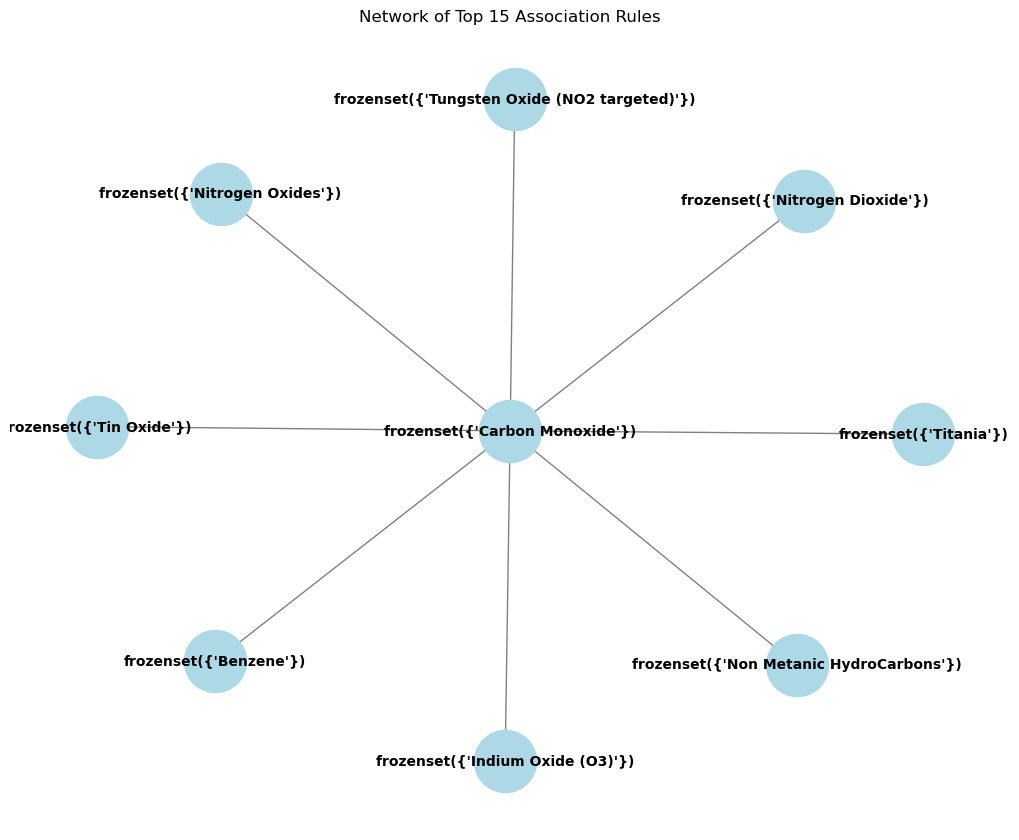

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.from_pandas_edgelist(rules.head(15), 'antecedents', 'consequents')

plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color='lightblue', font_size=10, node_size=2000, font_weight='bold', edge_color='gray')
plt.title("Network of Top 15 Association Rules")
plt.show()

###**Naïve Bayes**

In [ ]:
aqi_clean = pd.read_csv('/content/air_quality_clean_output.csv')
aqi_clean.head()

DateTime  index  Carbon Monoxide  Tin Oxide  \
0  2004-03-10 18:00:00      0              2.6     1360.0   
1  2004-03-10 19:00:00      1              2.0     1292.0   
2  2004-03-10 20:00:00      2              2.2     1402.0   
3  2004-03-10 21:00:00      3              2.2     1376.0   
4  2004-03-10 22:00:00      4              1.6     1272.0   

   Non Metanic HydroCarbons  Benzene  Titania  Nitrogen Oxides  \
0                     150.0     11.9   1046.0            166.0   
1                     112.0      9.4    955.0            103.0   
2                      88.0      9.0    939.0            131.0   
3                      80.0      9.2    948.0            172.0   
4                      51.0      6.5    836.0            131.0   

   Tungsten Oxide (NOx targeted)  Nitrogen Dioxide  \
0                         1056.0             113.0   
1                         1174.0              92.0   
2                         1140.0             114.0   
3                         1092.0             122.0   
4                         1205.0             116.0   

   Tungsten Oxide (NO2 targeted)  Indium Oxide (O3)  Temperature in Â°C  \
0                         1692.0             1268.0                13.6   
1                         1559.0              972.0                13.3   
2                         1555.0             1074.0                11.9   
3                         1584.0             1203.0                11.0   
4                         1490.0             1110.0                11.2   

   Relative Humidity (%)  Absolute Humidity  O3_AQI         AQI_Category  
0                   48.9             0.7578     135  Moderately polluted  
1                   47.7             0.7255     115  Moderately polluted  
2                   54.0             0.7502     122  Moderately polluted  
3                   60.0             0.7867     130  Moderately polluted  
4                   59.6             0.7888     124  Moderately polluted

In [ ]:
aqi_clean_1=aqi_clean[['Carbon Monoxide', 'Tin Oxide', 'Non Metanic HydroCarbons', 'Benzene',
       'Titania', 'Nitrogen Oxides', 'Tungsten Oxide (NOx targeted)',
       'Nitrogen Dioxide', 'Tungsten Oxide (NO2 targeted)',
       'Indium Oxide (O3)', 'Temperature in Â°C', 'Relative Humidity (%)',
       'Absolute Humidity','O3_AQI','AQI_Category']]

In [ ]:
aqi_clean_1['AQI_Category'].value_counts()

AQI_Category
Moderately polluted    6505
Satisfactory           2058
Good                    790
Poor                      4
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
features = aqi_clean_1.drop(columns=['AQI_Category','O3_AQI'])
target = aqi_clean_1['AQI_Category']

label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Splitting the dataset into Training and Testing sets (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.3, random_state=42)

X_train.head()

Carbon Monoxide  Tin Oxide  Non Metanic HydroCarbons  Benzene  Titania  \
4503         1.220000     1409.0                     275.0     20.9   1322.0   
5316         3.533333     1011.0                     275.0      9.2    947.0   
4482         3.000000     1346.0                     275.0     18.2   1246.0   
4952         4.976923      982.0                     275.0      5.1    768.0   
1755         1.200000     1123.0                     275.0      6.4    832.0   

      Nitrogen Oxides  Tungsten Oxide (NOx targeted)  Nitrogen Dioxide  \
4503       156.200000                          562.0         63.200000   
5316       528.333333                          759.0        135.333333   
4482       353.000000                          639.0        138.000000   
4952       477.000000                          850.0        150.076923   
1755        65.000000                          930.0         68.000000   

      Tungsten Oxide (NO2 targeted)  Indium Oxide (O3)  Temperature in Â°C  \
4503                         2004.0             1601.0                26.5   
5316                         1425.0              953.0                12.6   
4482                         1907.0             1458.0                32.6   
4952                         1416.0              835.0                21.2   
1755                         1565.0              792.0                21.2   

      Relative Humidity (%)  Absolute Humidity  
4503                   50.2             1.7130  
5316                   73.6             1.0699  
4482                   34.8             1.6872  
4952                   61.5             1.5241  
1755                   48.3             1.2034

In [ ]:
X_test.head()


Carbon Monoxide  Tin Oxide  Non Metanic HydroCarbons  Benzene  Titania  \
2973              1.3      933.0                     275.0      6.4    831.0   
3396              0.8      894.0                     275.0      4.9    761.0   
4372              2.6     1226.0                     275.0     14.6   1138.0   
6025              3.1     1101.0                     275.0     14.5   1134.0   
7960              1.3      966.0                     275.0      4.9    760.0   

      Nitrogen Oxides  Tungsten Oxide (NOx targeted)  Nitrogen Dioxide  \
2973            105.0                          888.0              72.0   
3396             36.0                          862.0              48.0   
4372            307.0                          862.0             146.0   
6025            427.0                          683.0             168.0   
7960            302.0                          877.0             200.0   

      Tungsten Oxide (NO2 targeted)  Indium Oxide (O3)  Temperature in Â°C  \
2973                         1514.0              710.0                26.0   
3396                         1504.0              768.0                23.0   
4372                         1481.0             1419.0                25.1   
6025                         1283.0             1281.0                13.6   
7960                          890.0              940.0                 7.5   

      Relative Humidity (%)  Absolute Humidity  
2973                   34.9             1.1509  
3396                   49.9             1.3849  
4372                   32.3             1.0131  
6025                   34.0             0.5251  
7960                   39.2             0.4091

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.metrics import accuracy_score

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_train_scaled, y_train)
y_pred_multinomial = multinomial_nb.predict(X_test_scaled)
accuracy_multinomial = accuracy_score(y_test, y_pred_multinomial)

accuracy_multinomial

0.6933760683760684

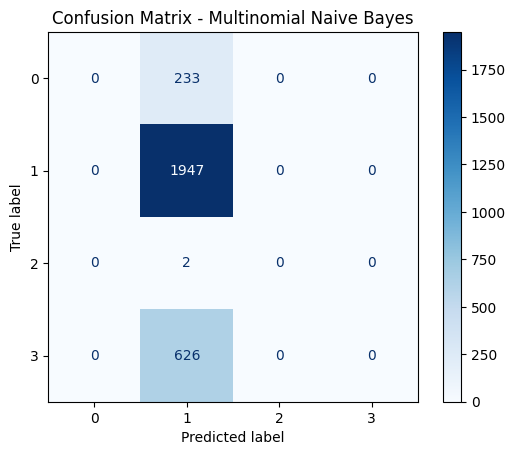

In [ ]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
conf_matrix_multinomial = confusion_matrix(y_test, y_pred_multinomial)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_multinomial, display_labels=multinomial_nb.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Multinomial Naive Bayes")
plt.show()

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bernoulli_nb = BernoulliNB()

X_train_binarized = (X_train_scaled > 0.5).astype(int)
X_test_binarized = (X_test_scaled > 0.5).astype(int)

bernoulli_nb.fit(X_train_binarized, y_train)
y_pred_bernoulli = bernoulli_nb.predict(X_test_binarized)

accuracy_bernoulli = accuracy_score(y_test, y_pred_bernoulli)
accuracy_bernoulli


0.6164529914529915

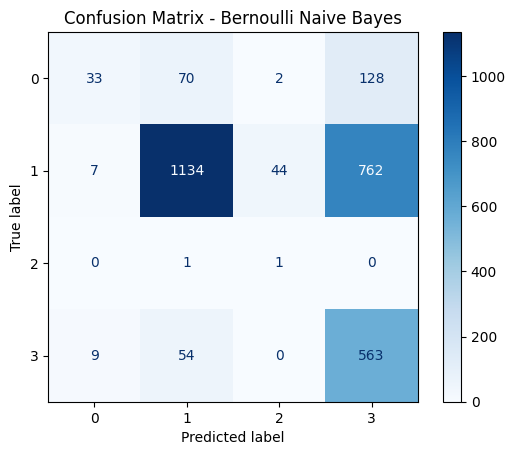

In [ ]:
conf_matrix_bernoulli = confusion_matrix(y_test, y_pred_bernoulli)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_bernoulli, display_labels=bernoulli_nb.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Bernoulli Naive Bayes")
plt.show()

In [ ]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import KBinsDiscretizer

k_bins = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
X_train_categorical = k_bins.fit_transform(X_train_scaled)
X_test_categorical = k_bins.transform(X_test_scaled)

categorical_nb = CategoricalNB()
categorical_nb.fit(X_train_categorical, y_train)

y_pred_categorical = categorical_nb.predict(X_test_categorical)

accuracy_categorical = accuracy_score(y_test, y_pred_categorical)

accuracy_categorical


0.8344017094017094

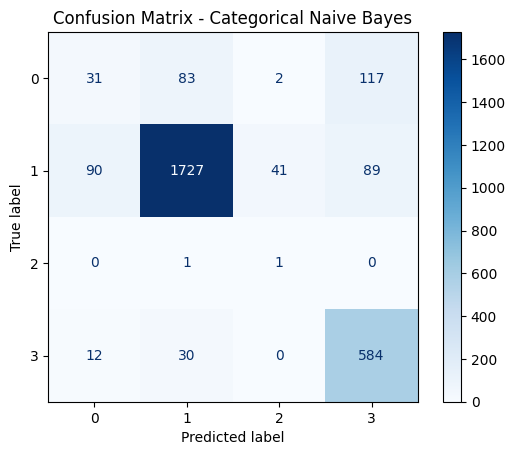

In [ ]:
conf_matrix_categorical = confusion_matrix(y_test, y_pred_categorical)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_categorical, display_labels=categorical_nb.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Categorical Naive Bayes")
plt.show()

In [ ]:
print(X_train_categorical)

[[0. 2. 0. ... 2. 2. 2.]
 [1. 1. 0. ... 1. 3. 1.]
 [0. 2. 0. ... 2. 1. 2.]
 ...
 [1. 2. 0. ... 2. 2. 2.]
 [1. 2. 1. ... 1. 1. 1.]
 [1. 2. 0. ... 1. 2. 1.]]


###**DECISION TREE**

In [ ]:
aqi_clean_1.head()

Carbon Monoxide  Tin Oxide  Non Metanic HydroCarbons  Benzene  Titania  \
0              2.6     1360.0                     150.0     11.9   1046.0   
1              2.0     1292.0                     112.0      9.4    955.0   
2              2.2     1402.0                      88.0      9.0    939.0   
3              2.2     1376.0                      80.0      9.2    948.0   
4              1.6     1272.0                      51.0      6.5    836.0   

   Nitrogen Oxides  Tungsten Oxide (NOx targeted)  Nitrogen Dioxide  \
0            166.0                         1056.0             113.0   
1            103.0                         1174.0              92.0   
2            131.0                         1140.0             114.0   
3            172.0                         1092.0             122.0   
4            131.0                         1205.0             116.0   

   Tungsten Oxide (NO2 targeted)  Indium Oxide (O3)  Temperature in Â°C  \
0                         1692.0             1268.0                13.6   
1                         1559.0              972.0                13.3   
2                         1555.0             1074.0                11.9   
3                         1584.0             1203.0                11.0   
4                         1490.0             1110.0                11.2   

   Relative Humidity (%)  Absolute Humidity  O3_AQI         AQI_Category  
0                   48.9             0.7578     135  Moderately polluted  
1                   47.7             0.7255     115  Moderately polluted  
2                   54.0             0.7502     122  Moderately polluted  
3                   60.0             0.7867     130  Moderately polluted  
4                   59.6             0.7888     124  Moderately polluted

In [ ]:
from sklearn.model_selection import train_test_split
features = aqi_clean_1.drop(columns=['AQI_Category','O3_AQI'])
target = aqi_clean_1['AQI_Category']

# Splitting the dataset into Training and Testing sets (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

X_train.head()

Carbon Monoxide  Tin Oxide  Non Metanic HydroCarbons  Benzene  Titania  \
4503         1.220000     1409.0                     275.0     20.9   1322.0   
5316         3.533333     1011.0                     275.0      9.2    947.0   
4482         3.000000     1346.0                     275.0     18.2   1246.0   
4952         4.976923      982.0                     275.0      5.1    768.0   
1755         1.200000     1123.0                     275.0      6.4    832.0   

      Nitrogen Oxides  Tungsten Oxide (NOx targeted)  Nitrogen Dioxide  \
4503       156.200000                          562.0         63.200000   
5316       528.333333                          759.0        135.333333   
4482       353.000000                          639.0        138.000000   
4952       477.000000                          850.0        150.076923   
1755        65.000000                          930.0         68.000000   

      Tungsten Oxide (NO2 targeted)  Indium Oxide (O3)  Temperature in Â°C  \
4503                         2004.0             1601.0                26.5   
5316                         1425.0              953.0                12.6   
4482                         1907.0             1458.0                32.6   
4952                         1416.0              835.0                21.2   
1755                         1565.0              792.0                21.2   

      Relative Humidity (%)  Absolute Humidity  
4503                   50.2             1.7130  
5316                   73.6             1.0699  
4482                   34.8             1.6872  
4952                   61.5             1.5241  
1755                   48.3             1.2034

In [ ]:
y_train

4503    Moderately polluted
5316    Moderately polluted
4482    Moderately polluted
4952    Moderately polluted
1755    Moderately polluted
               ...         
5734    Moderately polluted
5191           Satisfactory
5390    Moderately polluted
860     Moderately polluted
7270    Moderately polluted
Name: AQI_Category, Length: 6549, dtype: object

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree1 = DecisionTreeClassifier(criterion="gini", random_state=42)
tree1.fit(X_train, y_train)
y_pred_tree1 = tree1.predict(X_test)
accuracy_tree1 = accuracy_score(y_test, y_pred_tree1)

tree2 = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
tree2.fit(X_train, y_train)
y_pred_tree2 = tree2.predict(X_test)
accuracy_tree2 = accuracy_score(y_test, y_pred_tree2)

tree3 = DecisionTreeClassifier(criterion="gini", min_samples_leaf=10, random_state=42)
tree3.fit(X_train, y_train)
y_pred_tree3 = tree3.predict(X_test)
accuracy_tree3 = accuracy_score(y_test, y_pred_tree3)

tree4 = DecisionTreeClassifier(criterion="gini", min_samples_split=20, random_state=42)
tree4.fit(X_train, y_train)
y_pred_tree4 = tree4.predict(X_test)
accuracy_tree4 = accuracy_score(y_test, y_pred_tree4)

tree5 = DecisionTreeClassifier(criterion="gini", min_impurity_decrease=0.01, random_state=42)
tree5.fit(X_train, y_train)
y_pred_tree5 = tree5.predict(X_test)
accuracy_tree5 = accuracy_score(y_test, y_pred_tree5)

print("Accuracy of Decision Tree Models:")
print(f"Tree 1 (Gini, Default): {accuracy_tree1}")
print(f"Tree 2 (Entropy, Max Depth=5): {accuracy_tree2}")
print(f"Tree 3 (Gini, Min Samples per Leaf=10): {accuracy_tree3}")
print(f"Tree 4 (Gini, Min Samples per Split=20): {accuracy_tree4}")
print(f"Tree 5 (Gini, Min Impurity Decrease=0.01): {accuracy_tree5}")

Accuracy of Decision Tree Models:
Tree 1 (Gini, Default): 0.9764957264957265
Tree 2 (Entropy, Max Depth=5): 0.9647435897435898
Tree 3 (Gini, Min Samples per Leaf=10): 0.9683048433048433
Tree 4 (Gini, Min Samples per Split=20): 0.969017094017094
Tree 5 (Gini, Min Impurity Decrease=0.01): 0.9604700854700855


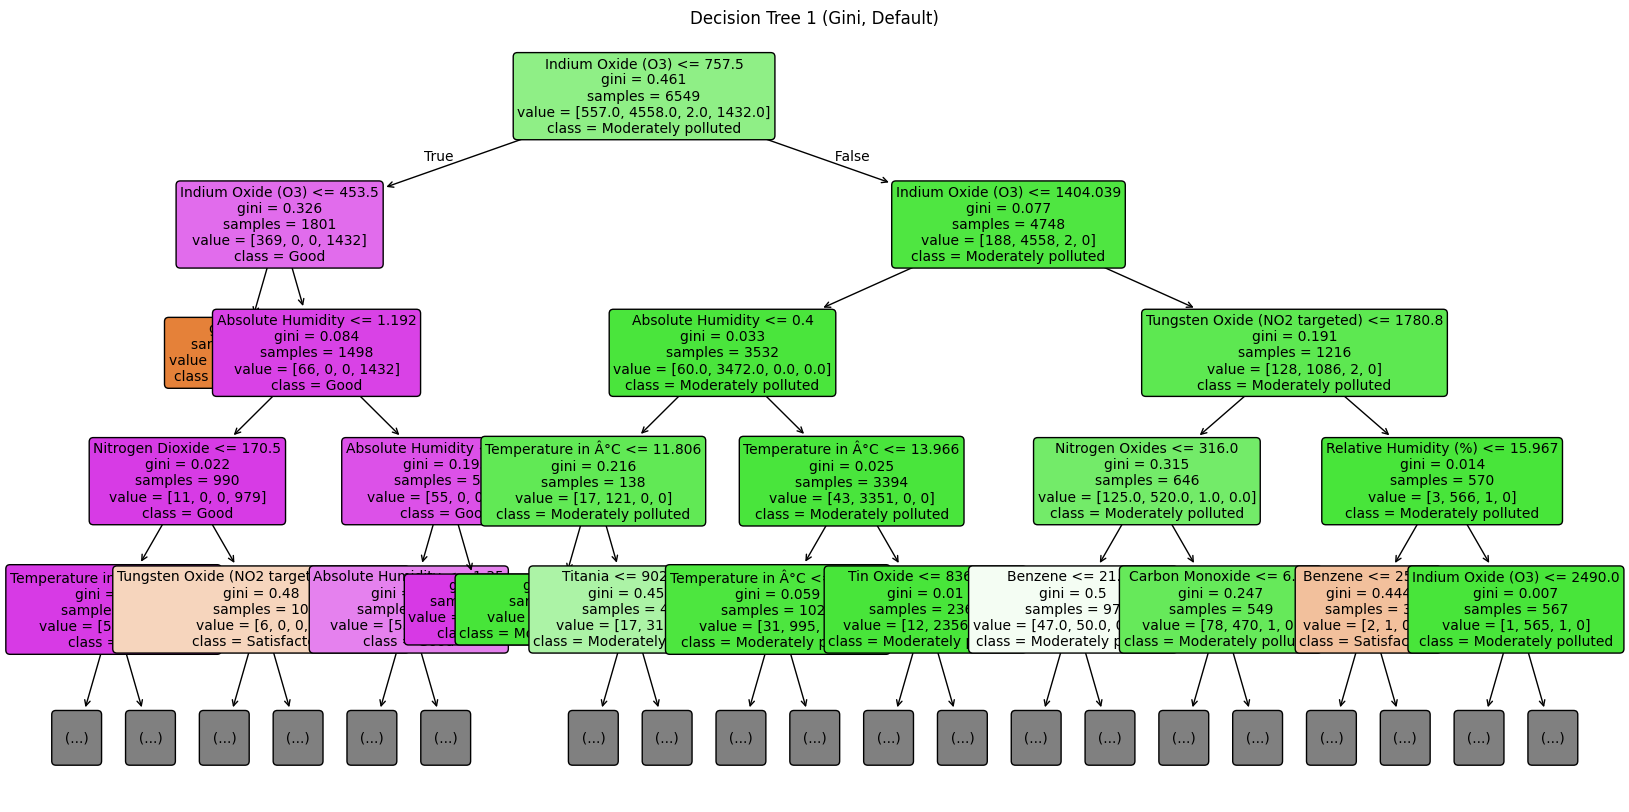

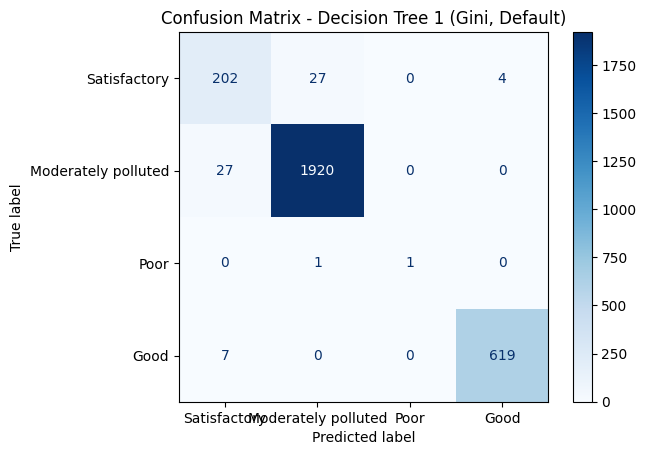

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    tree1,
    max_depth=4,
    filled=True,
    rounded=True,
    feature_names=X_train.columns,
    class_names=[str(label) for label in set(y_train)],
    fontsize=10
)
plt.title("Decision Tree 1 (Gini, Default)")
plt.show()

y_pred_tree1 = tree1.predict(X_test)
conf_matrix_tree1 = confusion_matrix(y_test, y_pred_tree1)
disp_tree1 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_tree1, display_labels=[str(label) for label in set(y_train)])
disp_tree1.plot(cmap="Blues")
plt.title("Confusion Matrix - Decision Tree 1 (Gini, Default)")
plt.show()


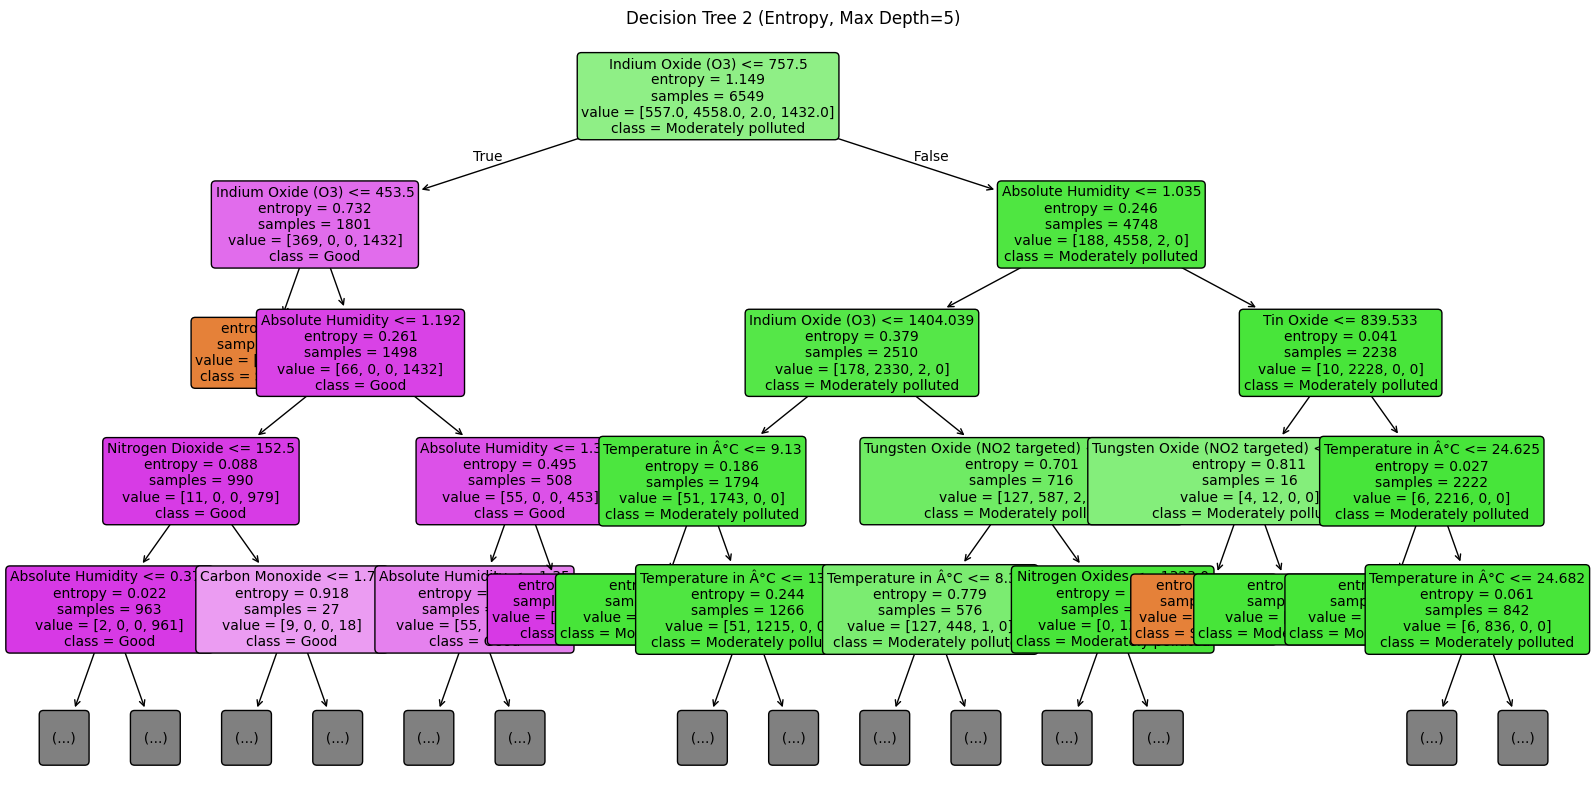

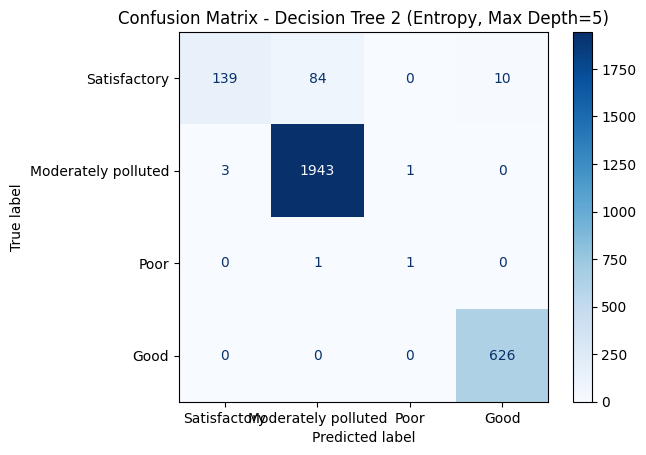

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(
    tree2,
    max_depth=4,
    filled=True,
    rounded=True,
    feature_names=X_train.columns,
    class_names=[str(label) for label in set(y_train)],
    fontsize=10
)
plt.title("Decision Tree 2 (Entropy, Max Depth=5)")
plt.show()

y_pred_tree2 = tree2.predict(X_test)
conf_matrix_tree2 = confusion_matrix(y_test, y_pred_tree2)
disp_tree2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_tree2, display_labels=[str(label) for label in set(y_train)])
disp_tree2.plot(cmap="Blues")
plt.title("Confusion Matrix - Decision Tree 2 (Entropy, Max Depth=5)")
plt.show()


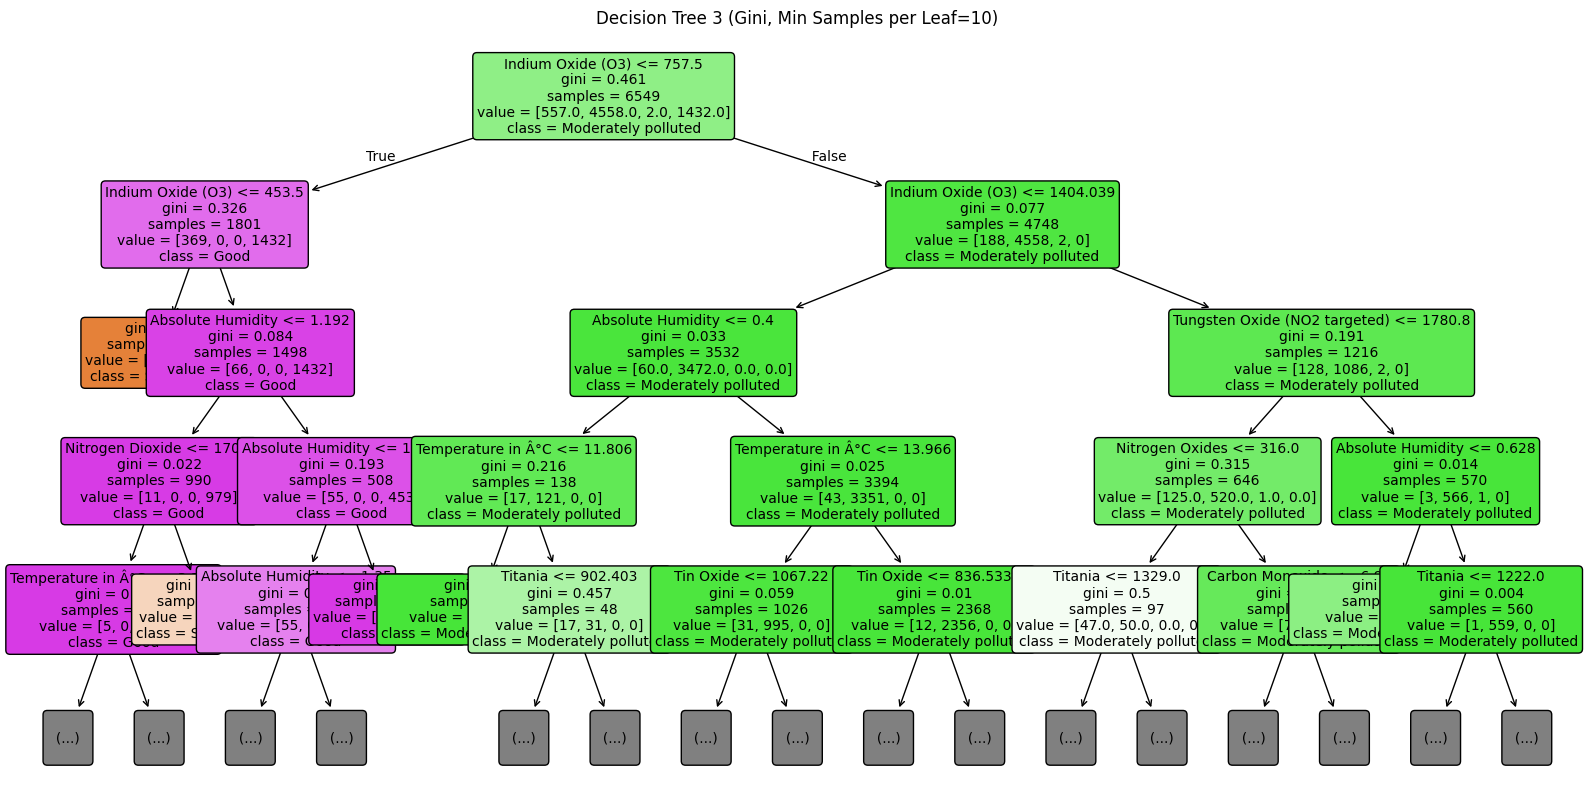

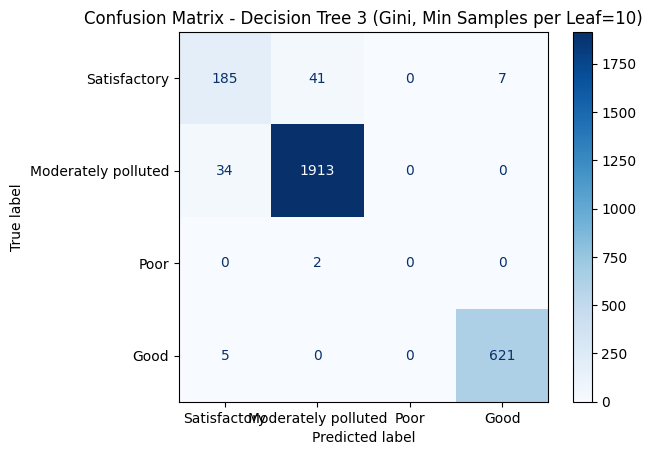

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(
    tree3,
    max_depth=4,
    filled=True,
    rounded=True,
    feature_names=X_train.columns,
    class_names=[str(label) for label in set(y_train)],
    fontsize=10
)
plt.title("Decision Tree 3 (Gini, Min Samples per Leaf=10)")
plt.show()

y_pred_tree3 = tree3.predict(X_test)
conf_matrix_tree3 = confusion_matrix(y_test, y_pred_tree3)
disp_tree3 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_tree3, display_labels=[str(label) for label in set(y_train)])
disp_tree3.plot(cmap="Blues")
plt.title("Confusion Matrix - Decision Tree 3 (Gini, Min Samples per Leaf=10)")
plt.show()


### Logistic Regression

In [ ]:
aqi_clean_log = aqi_clean_1.drop(['AQI_Category'],axis=1)
aqi_clean_log.head()

Carbon Monoxide  Tin Oxide  Non Metanic HydroCarbons  Benzene  Titania  \
0              2.6     1360.0                     150.0     11.9   1046.0   
1              2.0     1292.0                     112.0      9.4    955.0   
2              2.2     1402.0                      88.0      9.0    939.0   
3              2.2     1376.0                      80.0      9.2    948.0   
4              1.6     1272.0                      51.0      6.5    836.0   

   Nitrogen Oxides  Tungsten Oxide (NOx targeted)  Nitrogen Dioxide  \
0            166.0                         1056.0             113.0   
1            103.0                         1174.0              92.0   
2            131.0                         1140.0             114.0   
3            172.0                         1092.0             122.0   
4            131.0                         1205.0             116.0   

   Tungsten Oxide (NO2 targeted)  Indium Oxide (O3)  Temperature in Â°C  \
0                         1692.0             1268.0                13.6   
1                         1559.0              972.0                13.3   
2                         1555.0             1074.0                11.9   
3                         1584.0             1203.0                11.0   
4                         1490.0             1110.0                11.2   

   Relative Humidity (%)  Absolute Humidity  O3_AQI  
0                   48.9             0.7578     135  
1                   47.7             0.7255     115  
2                   54.0             0.7502     122  
3                   60.0             0.7867     130  
4                   59.6             0.7888     124

In [ ]:
aqi_clean_log['AQI_Binary'] = np.where(aqi_clean_log['O3_AQI'] <= 100, 'Acceptable', 'Polluted')
aqi_clean_log.head()


Carbon Monoxide  Tin Oxide  Non Metanic HydroCarbons  Benzene  Titania  \
0              2.6     1360.0                     150.0     11.9   1046.0   
1              2.0     1292.0                     112.0      9.4    955.0   
2              2.2     1402.0                      88.0      9.0    939.0   
3              2.2     1376.0                      80.0      9.2    948.0   
4              1.6     1272.0                      51.0      6.5    836.0   

   Nitrogen Oxides  Tungsten Oxide (NOx targeted)  Nitrogen Dioxide  \
0            166.0                         1056.0             113.0   
1            103.0                         1174.0              92.0   
2            131.0                         1140.0             114.0   
3            172.0                         1092.0             122.0   
4            131.0                         1205.0             116.0   

   Tungsten Oxide (NO2 targeted)  Indium Oxide (O3)  Temperature in Â°C  \
0                         1692.0             1268.0                13.6   
1                         1559.0              972.0                13.3   
2                         1555.0             1074.0                11.9   
3                         1584.0             1203.0                11.0   
4                         1490.0             1110.0                11.2   

   Relative Humidity (%)  Absolute Humidity  O3_AQI AQI_Binary  
0                   48.9             0.7578     135   Polluted  
1                   47.7             0.7255     115   Polluted  
2                   54.0             0.7502     122   Polluted  
3                   60.0             0.7867     130   Polluted  
4                   59.6             0.7888     124   Polluted

In [ ]:
aqi_clean_log.columns

Index(['Carbon Monoxide', 'Tin Oxide', 'Non Metanic HydroCarbons', 'Benzene',
       'Titania', 'Nitrogen Oxides', 'Tungsten Oxide (NOx targeted)',
       'Nitrogen Dioxide', 'Tungsten Oxide (NO2 targeted)',
       'Indium Oxide (O3)', 'Temperature in Â°C', 'Relative Humidity (%)',
       'Absolute Humidity', 'O3_AQI', 'AQI_Binary'],
      dtype='object')

In [ ]:
aqi_clean_log.dtypes

Carbon Monoxide                  float64
Tin Oxide                        float64
Non Metanic HydroCarbons         float64
Benzene                          float64
Titania                          float64
Nitrogen Oxides                  float64
Tungsten Oxide (NOx targeted)    float64
Nitrogen Dioxide                 float64
Tungsten Oxide (NO2 targeted)    float64
Indium Oxide (O3)                float64
Temperature in Â°C               float64
Relative Humidity (%)            float64
Absolute Humidity                float64
O3_AQI                             int64
AQI_Binary                        object
dtype: object

In [ ]:
aqi_clean_log['AQI_Binary'].value_counts()

AQI_Binary
Polluted      6509
Acceptable    2848
Name: count, dtype: int64

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder

aqi_clean_log['AQI_Binary'] = aqi_clean_log['AQI_Binary'].apply(lambda x: 1 if x == 'Polluted' else 0)

X = aqi_clean_log.drop(columns=['O3_AQI', 'AQI_Binary'])
y = aqi_clean_log['AQI_Binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nScaled Training features sample:")
print(X_train_scaled[:5])

print("\nScaled Test features sample:")
print(X_test_scaled[:5])


Scaled Training features sample:
[[ 0.89488501  1.00403881  0.06978802  1.39755112  1.3707459   1.10625651
   0.32822822  1.61289627 -0.05848986  1.28085119  1.50025415 -1.63142611
  -0.1896982 ]
 [-0.65408865 -0.63912339 -2.76484347 -0.86564625 -0.93374245 -0.75353174
   1.33557124 -0.59065161 -0.46931328 -1.13810222 -0.86511041  0.48697027
  -0.70392843]
 [-0.65408865 -0.91000793  0.06978802 -0.97256896 -1.09805238 -0.26477762
   0.67742316  0.48104567 -1.84196975 -1.29646971 -1.29886627 -0.48404216
  -1.52250579]
 [ 0.54284554 -0.08817176  0.06978802  0.87184779  0.96329045 -0.27944024
  -0.57266876  1.0597622   0.87705827  1.16812433  1.09820559 -1.32132234
  -0.11027325]
 [-1.28775969 -1.48850714  0.06978802 -1.33343311 -2.0166943  -1.01745896
   3.23991688 -1.68378282 -2.24500505 -1.92004169 -1.75545138  0.19043354
  -1.54738656]]

Scaled Test features sample:
[[-0.58368075 -0.78145255  0.06978802 -0.5047821  -0.41467242 -0.67044354
   0.21399344 -0.80499106  0.17904785 -0.79909


Logistic Regression Accuracy: 0.9209401709401709


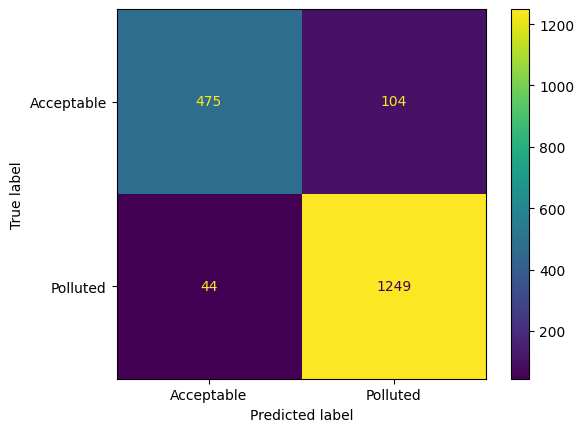

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

y_pred_log_reg = log_reg.predict(X_test_scaled)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

print("\nLogistic Regression Accuracy:", accuracy_log_reg)
ConfusionMatrixDisplay(conf_matrix_log_reg, display_labels=['Acceptable', 'Polluted']).plot()



Multinomial Naive Bayes Accuracy: 0.8231837606837606


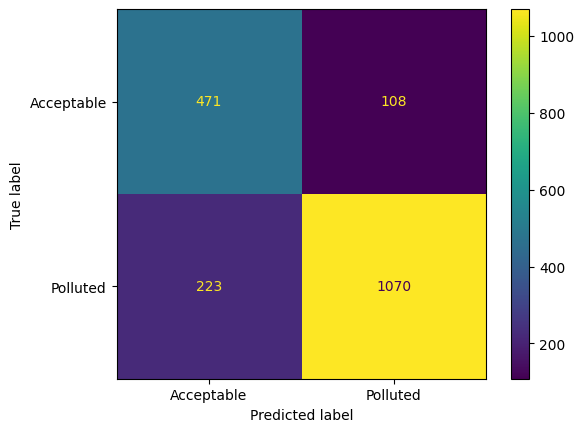

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

# Discretize the features for Multinomial Naive Bayes
k_bins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_train_binned = k_bins.fit_transform(X_train)
X_test_binned = k_bins.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_binned, y_train)

y_pred_nb = nb.predict(X_test_binned)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

print("\nMultinomial Naive Bayes Accuracy:", accuracy_nb)
ConfusionMatrixDisplay(conf_matrix_nb, display_labels=['Acceptable', 'Polluted']).plot()


##**SVM**

In [ ]:
aqi_clean_1.head()

Carbon Monoxide  Tin Oxide  Non Metanic HydroCarbons  Benzene  Titania  \
0              2.6     1360.0                     150.0     11.9   1046.0   
1              2.0     1292.0                     112.0      9.4    955.0   
2              2.2     1402.0                      88.0      9.0    939.0   
3              2.2     1376.0                      80.0      9.2    948.0   
4              1.6     1272.0                      51.0      6.5    836.0   

   Nitrogen Oxides  Tungsten Oxide (NOx targeted)  Nitrogen Dioxide  \
0            166.0                         1056.0             113.0   
1            103.0                         1174.0              92.0   
2            131.0                         1140.0             114.0   
3            172.0                         1092.0             122.0   
4            131.0                         1205.0             116.0   

   Tungsten Oxide (NO2 targeted)  Indium Oxide (O3)  Temperature in Â°C  \
0                         1692.0             1268.0                13.6   
1                         1559.0              972.0                13.3   
2                         1555.0             1074.0                11.9   
3                         1584.0             1203.0                11.0   
4                         1490.0             1110.0                11.2   

   Relative Humidity (%)  Absolute Humidity  O3_AQI         AQI_Category  
0                   48.9             0.7578     135  Moderately polluted  
1                   47.7             0.7255     115  Moderately polluted  
2                   54.0             0.7502     122  Moderately polluted  
3                   60.0             0.7867     130  Moderately polluted  
4                   59.6             0.7888     124  Moderately polluted

In [ ]:
aqi_clean_1.dtypes

Carbon Monoxide                  float64
Tin Oxide                        float64
Non Metanic HydroCarbons         float64
Benzene                          float64
Titania                          float64
Nitrogen Oxides                  float64
Tungsten Oxide (NOx targeted)    float64
Nitrogen Dioxide                 float64
Tungsten Oxide (NO2 targeted)    float64
Indium Oxide (O3)                float64
Temperature in Â°C               float64
Relative Humidity (%)            float64
Absolute Humidity                float64
O3_AQI                             int64
AQI_Category                      object
dtype: object

In [ ]:
aqi_svm = aqi_clean_1.drop(columns=['O3_AQI'])
aqi_svm.head()

Carbon Monoxide  Tin Oxide  Non Metanic HydroCarbons  Benzene  Titania  \
0              2.6     1360.0                     150.0     11.9   1046.0   
1              2.0     1292.0                     112.0      9.4    955.0   
2              2.2     1402.0                      88.0      9.0    939.0   
3              2.2     1376.0                      80.0      9.2    948.0   
4              1.6     1272.0                      51.0      6.5    836.0   

   Nitrogen Oxides  Tungsten Oxide (NOx targeted)  Nitrogen Dioxide  \
0            166.0                         1056.0             113.0   
1            103.0                         1174.0              92.0   
2            131.0                         1140.0             114.0   
3            172.0                         1092.0             122.0   
4            131.0                         1205.0             116.0   

   Tungsten Oxide (NO2 targeted)  Indium Oxide (O3)  Temperature in Â°C  \
0                         1692.0             1268.0                13.6   
1                         1559.0              972.0                13.3   
2                         1555.0             1074.0                11.9   
3                         1584.0             1203.0                11.0   
4                         1490.0             1110.0                11.2   

   Relative Humidity (%)  Absolute Humidity         AQI_Category  
0                   48.9             0.7578  Moderately polluted  
1                   47.7             0.7255  Moderately polluted  
2                   54.0             0.7502  Moderately polluted  
3                   60.0             0.7867  Moderately polluted  
4                   59.6             0.7888  Moderately polluted

In [ ]:
aqi_clean_1['AQI_Category'].value_counts()

AQI_Category
Moderately polluted    6505
Satisfactory           2058
Good                    790
Poor                      4
Name: count, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
# Encode the target column
label_encoder = LabelEncoder()
aqi_svm['AQI_Category'] = label_encoder.fit_transform(aqi_svm['AQI_Category'])

# Define features (X) and target (y)
X = aqi_svm.drop(columns=['AQI_Category'])
y = aqi_svm['AQI_Category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
X_train.head()

Carbon Monoxide    Tin Oxide  Non Metanic HydroCarbons    Benzene  \
4367              3.4  1321.888889                     275.0  20.633333   
794               1.2   964.000000                      68.0   3.700000   
8496              1.2   905.000000                     275.0   2.900000   
3027              2.9  1084.000000                     275.0  16.700000   
8508              0.3   779.000000                     275.0   0.200000   

          Titania  Nitrogen Oxides  Tungsten Oxide (NOx targeted)  \
4367  1309.111111       468.516129                     917.333333   
794    692.000000        88.000000                    1176.000000   
8496   648.000000       188.000000                    1007.000000   
3027  1200.000000       185.000000                     686.000000   
8508   402.000000        34.000000                    1665.000000   

      Nitrogen Dioxide  Tungsten Oxide (NO2 targeted)  Indium Oxide (O3)  \
4367        184.806452                    1432.666667        1550.555556   
794          82.000000                    1292.000000         573.000000   
8496        132.000000                     822.000000         509.000000   
3027        159.000000                    1753.000000        1505.000000   
8508         31.000000                     684.000000         257.000000   

      Temperature in Â°C  Relative Humidity (%)  Absolute Humidity  
4367           31.322222              21.266667           0.942878  
794            10.600000              57.700000           0.736200  
8496            6.800000              41.000000           0.407200  
3027           27.800000              26.600000           0.974800  
8508            2.800000              52.600000           0.397200

In [ ]:
X_test.head()

Carbon Monoxide  Tin Oxide  Non Metanic HydroCarbons  Benzene  Titania  \
2973              1.3      933.0                     275.0      6.4    831.0   
3396              0.8      894.0                     275.0      4.9    761.0   
4372              2.6     1226.0                     275.0     14.6   1138.0   
6025              3.1     1101.0                     275.0     14.5   1134.0   
7960              1.3      966.0                     275.0      4.9    760.0   

      Nitrogen Oxides  Tungsten Oxide (NOx targeted)  Nitrogen Dioxide  \
2973            105.0                          888.0              72.0   
3396             36.0                          862.0              48.0   
4372            307.0                          862.0             146.0   
6025            427.0                          683.0             168.0   
7960            302.0                          877.0             200.0   

      Tungsten Oxide (NO2 targeted)  Indium Oxide (O3)  Temperature in Â°C  \
2973                         1514.0              710.0                26.0   
3396                         1504.0              768.0                23.0   
4372                         1481.0             1419.0                25.1   
6025                         1283.0             1281.0                13.6   
7960                          890.0              940.0                 7.5   

      Relative Humidity (%)  Absolute Humidity  
2973                   34.9             1.1509  
3396                   49.9             1.3849  
4372                   32.3             1.0131  
6025                   34.0             0.5251  
7960                   39.2             0.4091

In [ ]:
y_train.head()

4367    0
794     3
8496    3
3027    1
8508    0
Name: AQI_Category, dtype: int64

In [ ]:
y_test.head()

2973    3
3396    1
4372    1
6025    1
7960    1
Name: AQI_Category, dtype: int64

Kernel: linear, C: 0.1, Accuracy: 0.9129273504273504


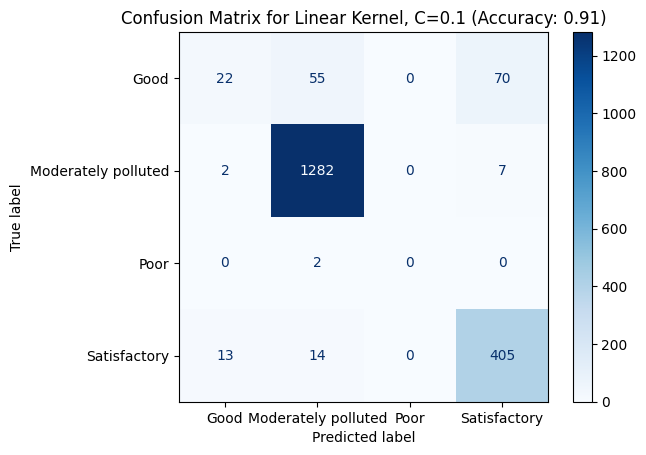

Kernel: linear, C: 1, Accuracy: 0.9268162393162394


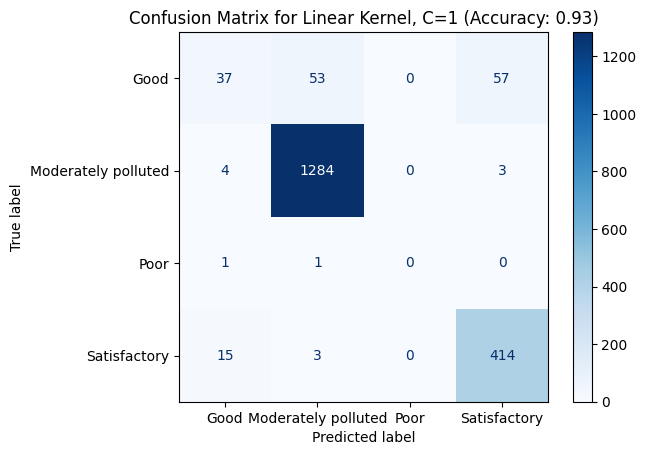

Kernel: linear, C: 10, Accuracy: 0.9321581196581197


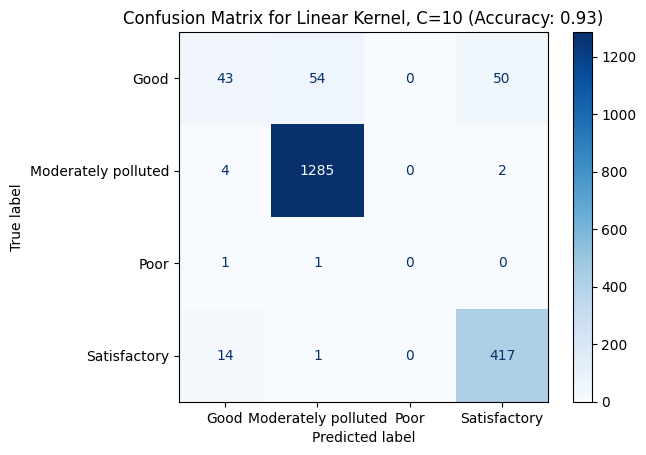

Kernel: poly, C: 0.1, Accuracy: 0.875534188034188


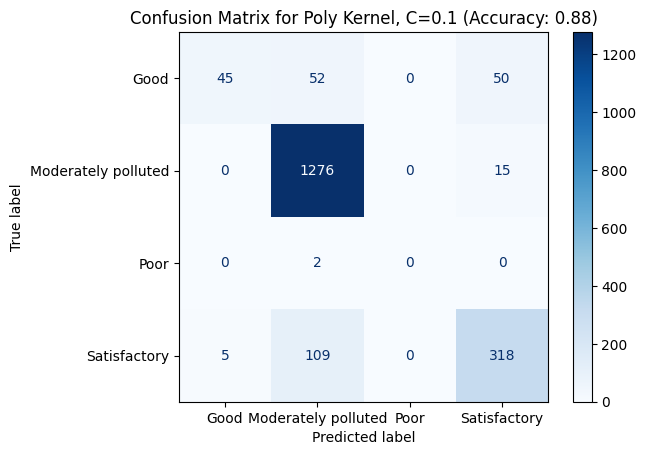

Kernel: poly, C: 1, Accuracy: 0.9214743589743589


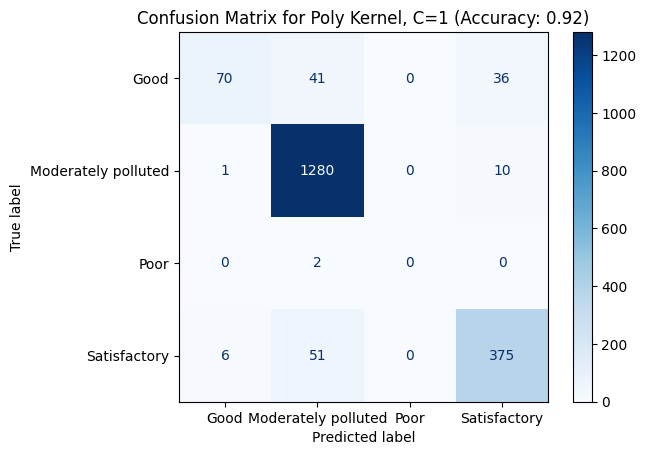

Kernel: poly, C: 10, Accuracy: 0.9481837606837606


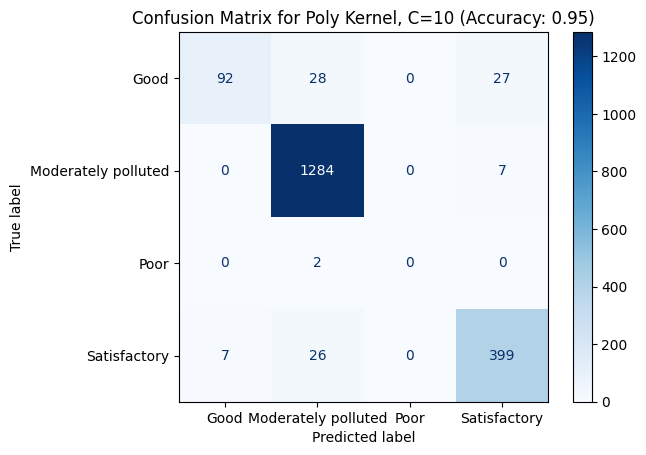

Kernel: rbf, C: 0.1, Accuracy: 0.9006410256410257


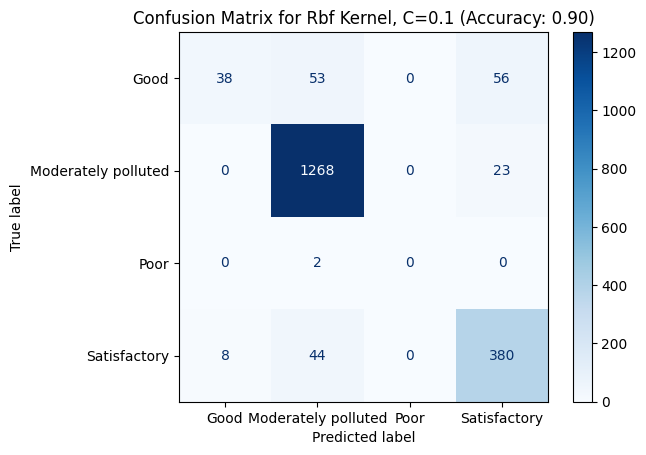

Kernel: rbf, C: 1, Accuracy: 0.9396367521367521


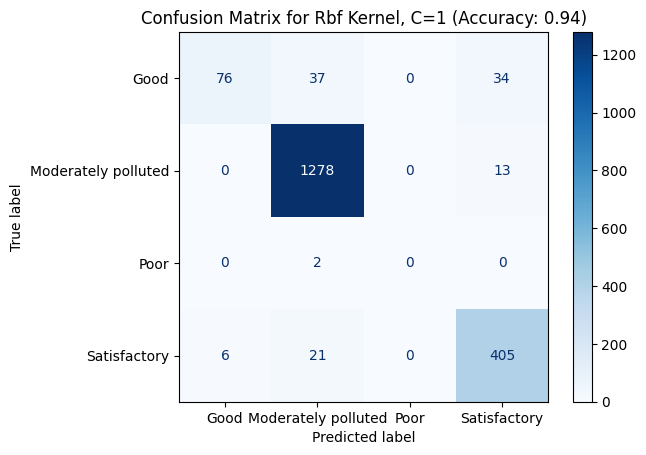

Kernel: rbf, C: 10, Accuracy: 0.9658119658119658


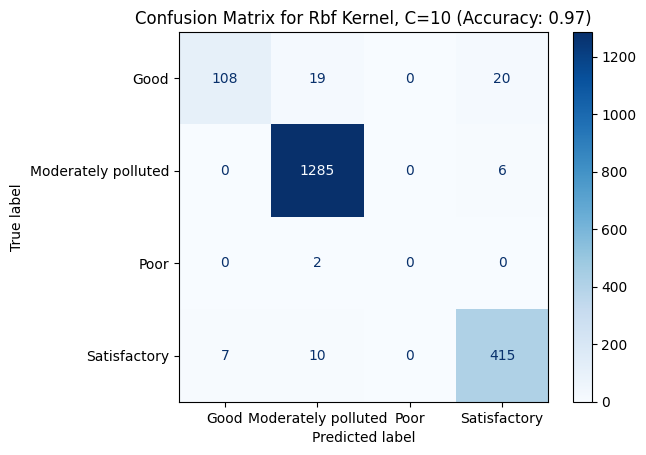

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Define kernels and C values to be used
kernels = ['linear', 'poly', 'rbf']
C_values = [0.1, 1, 10]

# Iterate over each kernel and each C value
for kernel in kernels:
    for C in C_values:
        # Train the SVM model with the specified kernel and C value
        svm_model = SVC(kernel=kernel, C=C, random_state=42)
        svm_model.fit(X_train_scaled, y_train)  # Assuming X_train_scaled and y_train are already defined

        # Make predictions
        y_pred = svm_model.predict(X_test_scaled)  # Assuming X_test_scaled and y_test are already defined

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Kernel: {kernel}, C: {C}, Accuracy: {accuracy}")

        # Generate confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Display confusion matrix with a title
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
        disp.plot(cmap="Blues")  # Add a color scheme
        plt.title(f"Confusion Matrix for {kernel.capitalize()} Kernel, C={C} (Accuracy: {accuracy:.2f})")
        plt.show()


In [ ]:
aqi_svm['AQI_Category'].value_counts()

##**Random forest**

Random Forest Accuracy: 0.9882478632478633


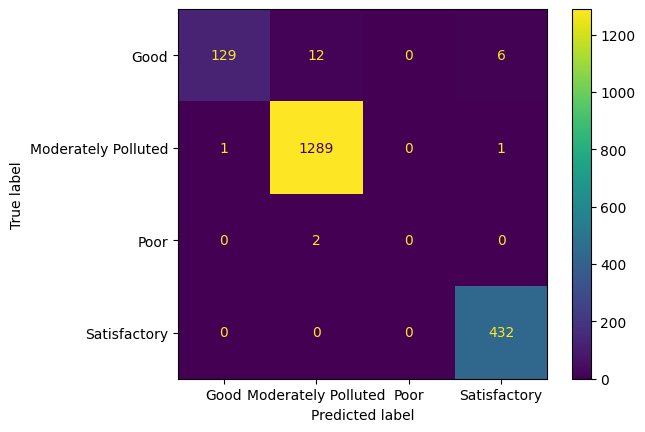

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display Results
print(f"Random Forest Accuracy: {accuracy_rf}")
ConfusionMatrixDisplay(cm_rf, display_labels=['Good', 'Moderately Polluted', 'Poor', 'Satisfactory']).plot()


##**XGBoost**

XGBoost Accuracy: 0.9877136752136753


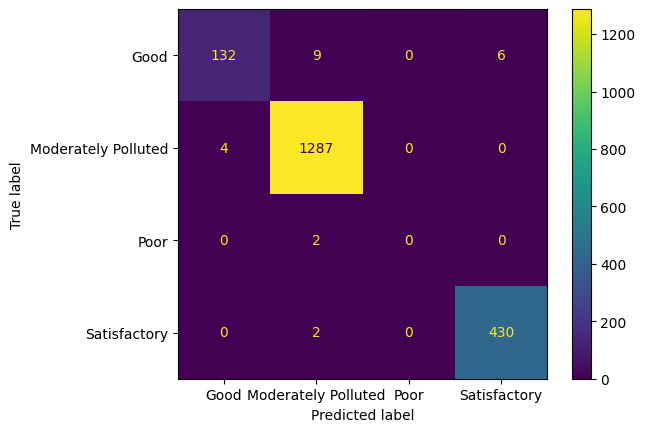

In [ ]:
from xgboost import XGBClassifier

# Train XGBoost
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Display Results
print(f"XGBoost Accuracy: {accuracy_xgb}")
ConfusionMatrixDisplay(cm_xgb, display_labels=['Good', 'Moderately Polluted', 'Poor', 'Satisfactory']).plot()


##**ADABoost**

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.7393162393162394


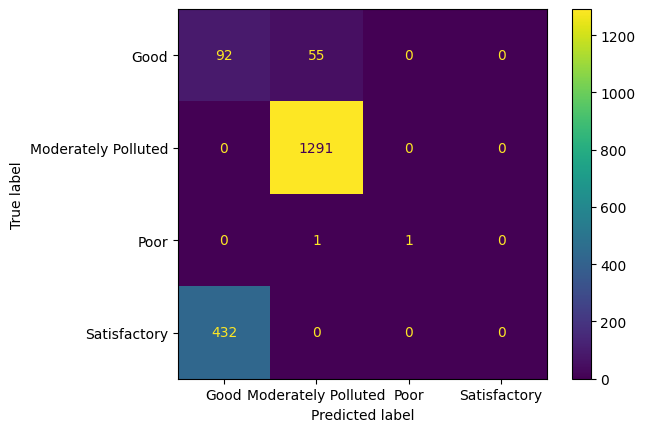

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Train AdaBoost
adaboost_model = AdaBoostClassifier(n_estimators=50, learning_rate=0.1, random_state=42)
adaboost_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred_ada = adaboost_model.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
cm_ada = confusion_matrix(y_test, y_pred_ada)

# Display Results
print(f"AdaBoost Accuracy: {accuracy_ada}")
ConfusionMatrixDisplay(cm_ada, display_labels=['Good', 'Moderately Polluted', 'Poor', 'Satisfactory']).plot()


##**Bagging**

In [ ]:
pip install --upgrade scikit-learn


Bagging Accuracy: 0.9893162393162394


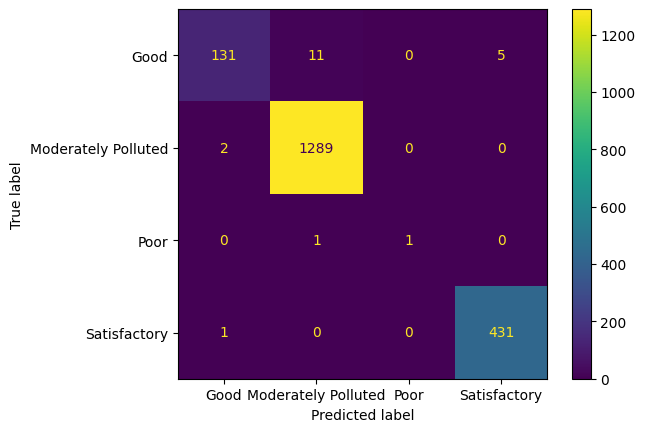

In [ ]:
# Required imports
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Train Bagging Classifier
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

bagging_model.fit(X_train, y_train)  # Assuming X_train and y_train are already defined and preprocessed

# Predict and Evaluate
y_pred_bagging = bagging_model.predict(X_test)  # Assuming X_test is already defined and preprocessed
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)  # Assuming y_test is defined
cm_bagging = confusion_matrix(y_test, y_pred_bagging)

# Display Results
print(f"Bagging Accuracy: {accuracy_bagging}")
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bagging, display_labels=['Good', 'Moderately Polluted', 'Poor', 'Satisfactory'])
disp.plot()


### Example: Polynomial Kernel Transformation

#### Given:
- A **2D point** $(x_1, x_2)$,
- Polynomial kernel parameters: (r = 1\) and \(d = 2\) (degree of the polynomial).

#### Goal:
Transform the point \((x_1, x_2)\) into the higher-dimensional feature space using the polynomial kernel.

#### Steps:

1. **Polynomial Kernel Formula**:
   The polynomial kernel maps a point into a space where polynomial interactions between features are represented. For r = 1 and d = 2, the transformation adds squared terms and cross-products:
   
   $\phi(x_1, x_2) = \big(1, x_1, x_2, x_1^2, x_1 \cdot x_2, x_2^2\big)
   $

2. **Transformation**:
   Given the original 2D point, for example, $(x_1 = 2, x_2 = 3)$, the transformed features become:
   $
   \phi(2, 3) = \big(1, 2, 3, 2^2, 2 \cdot 3, 3^2\big)$

3. **Calculation**:
   Substitute $(x_1 = 2)$ and $(x_2 = 3)$:
   $[
   \phi(2, 3) = \big(1, 2, 3, 4, 6, 9\big)
   ]$

4. **Result**:
   The original point (2, 3) is "cast" into a 6-dimensional space:
   $[
   \phi(2, 3) = \big(1, 2, 3, 4, 6, 9\big)
   ]$

---

#### Explanation:
- The first three terms $(1, x_1, x_2)$ represent the original bias and features.
- The next three terms $(x_1^2, x_1 \cdot x_2, x_2^2)$ introduce higher-order interactions, enabling the SVM to classify data with quadratic or curved boundaries.

This transformation is crucial for SVMs with a polynomial kernel, allowing them to separate non-linear data effectively in a higher-dimensional space.